In [80]:
#creating a dataframe from the file with the dataset 
#import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 
passengers = pd.read_csv("titanic.csv")
passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [81]:
#can eliminate attributes that are unique to each customer as they do not help in clustering 
passengers.drop('Name', axis=1,inplace=True)
passengers.drop('Ticket', axis=1,inplace=True)
passengers.drop('Cabin', axis=1,inplace=True)
passengers

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [82]:
#drop NaN values (taking averages will skew the data, dataset is large it is okay to drop)
passengers.dropna(inplace=True)
passengers = passengers.sort_values(by = "PassengerId", ascending = True)
passengers.reset_index(drop=True, inplace=True)
passengers

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
707,886,0,3,female,39.0,0,5,29.1250,Q
708,887,0,2,male,27.0,0,0,13.0000,S
709,888,1,1,female,19.0,0,0,30.0000,S
710,890,1,1,male,26.0,0,0,30.0000,C


In [83]:
#assign 'Embarked' and 'Sex' values with a number for ease of clustering 
embarked_list = pd.unique(passengers['Embarked'])
embarked_list = embarked_list.tolist()
#print(embarked_list)
for i in passengers.index:
    #print(passengers['Embarked'][i])
    index = embarked_list.index(passengers['Embarked'][i])
    passengers.iloc[[i],[8]] = index
gender_list = pd.unique(passengers['Sex'])
gender_list = gender_list.tolist()
for i in passengers.index:
    index = gender_list.index(passengers['Sex'][i])
    passengers.iloc[[i],[3]] = index
passengers

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
707,886,0,3,1,39.0,0,5,29.1250,2
708,887,0,2,0,27.0,0,0,13.0000,0
709,888,1,1,1,19.0,0,0,30.0000,0
710,890,1,1,0,26.0,0,0,30.0000,1


In [84]:
#min-max normalize other values for easier computation 
normalize_columns = ['Age', 'Fare'] 
for element in normalize_columns:
    for value in passengers[element]:
        passengers[element] = passengers[element].replace([value], (value - passengers[element].min())/(passengers[element].max() - passengers[element].min()))
passengers


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,0.271174,1,0,0.014151,0
1,2,1,1,1,0.473214,1,0,0.139136,1
2,3,1,3,1,0.322704,0,0,0.015469,0
3,4,1,1,1,0.435587,1,0,0.103644,0
4,5,0,3,0,0.435587,0,0,0.015713,0
...,...,...,...,...,...,...,...,...,...
707,886,0,3,1,0.487361,0,5,0.056848,2
708,887,0,2,0,0.337320,0,0,0.025374,0
709,888,1,1,1,0.237293,0,0,0.141953,0
710,890,1,1,0,0.322704,0,0,0.141953,1


In [85]:
survived_vals = []
pclass_vals = []
sex_vals = []
age_vals = []
sibsp_vals = []
parch_vals = []
fare_vals = []
embarked_vals = []
for (survived, pclass, sex, age, sibsp, parch, fare, embarked) in zip(passengers.get('Survived'), passengers.get('Pclass'), passengers.get('Sex'), passengers.get('Age'), passengers.get('SibSp'), passengers.get('Parch'), passengers.get('Fare'), passengers.get('Embarked')): 
    survived_vals.append(survived)
    pclass_vals.append(pclass)
    sex_vals.append(sex)
    age_vals.append(age)
    sibsp_vals.append(sibsp)
    parch_vals.append(parch)
    fare_vals.append(fare)
    embarked_vals.append(embarked)
#print(survived_vals)

In [88]:
#vary w and b together 
gradient_graph = []
b = 0.5
w_pclass = 0.2
w_sex = 0.2
w_age = 0.2
w_sibsp = 0.2
w_parch = 0.2
w_fare = 0.2
w_embarked = 0.2

lows = []

prev_total_cost = 0
total_cost = 0
prev_total_cost_b = 0
total_cost_b = 0
changed_survived_vals = []
changed_survived_vals_b = []
cost_function_vals = []
cost_function_b = []

#print(len(survived_vals))
for i in range(0, len(survived_vals)):
    new_survived = pclass_vals[i]*w_pclass + sex_vals[i]*w_sex + age_vals[i]*w_age + sibsp_vals[i]*w_sibsp + parch_vals[i]*w_parch + fare_vals[i]*w_fare + embarked_vals[i]*w_embarked + b
    sigmoid_survived = 1/(1 + (math.e)**(-new_survived))
    #print(sigmoid_survived)
    #print("new survived calculated " + str(new_survived))
    changed_survived_vals.append(sigmoid_survived)
for i in range (0, len(changed_survived_vals)):
    #print("i is " + str(i))
    cost = -survived_vals[i]*math.log(changed_survived_vals[i]) - (1- survived_vals[i])*math.log(1 - changed_survived_vals[i])
    #cost = (changed_survived_vals[i] - survived_vals[i])**2
    cost_function_vals.append(cost)
    total_cost = total_cost + cost_function_vals[i] 
    #print("Adding to total cost " + str(cost))
total_cost = total_cost/len(changed_survived_vals)
prev_total_cost = total_cost 
print("Initial total cost " + str(total_cost))
print("Initial previous total cost " + str(prev_total_cost))


Initial total cost 1.036255053826932
Initial previous total cost 1.036255053826932


In [ ]:
# make function
    if(op_count > 0):
        w_embarked = w_embarked - learning_rate*embarked_gradient_descent_cost
        #print(" subtracting {} from b value".format(learning_rate*gradient_descent_cost))
    #print("w value is " + str(w))
    #print(" b value is " + str(b))
    embarked_gradient_descent_cost = 0
    changed_survived_vals =  []
    cost_function_vals = []
    #print(changed_survived_vals)
    #print(cost_function_vals)
    for i in range(0, len(survived_vals)):
        new_survived = pclass_vals[i]*w_pclass + sex_vals[i]*w_sex + age_vals[i]*w_age + sibsp_vals[i]*w_sibsp + parch_vals[i]*w_parch + fare_vals[i]*w_fare + embarked_vals[i]*w_embarked + b
        sigmoid_survived = 1/(1 + (math.e)**(-new_survived))
        changed_survived_vals_b.append(sigmoid_survived)
        #print("new surviveds values: " + str(new_survived))
    for i in range (0, len(changed_survived_vals)):
        cost = -survived_vals[i]*math.log(changed_survived_vals[i]) - (1- survived_vals[i])*math.log(1 - changed_survived_vals[i])
        embarked_gradient_descent_cost = fembarked_gradient_descent_cost + ((changed_survived_vals[i] - survived_vals[i])*embarked_vals[i])
        #print("gradient descent cost updated with " + str(gradient_descent_cost))
        cost_function_vals.append(cost)
        total_cost = total_cost + cost_function_vals[i] 
    total_cost = total_cost/len(changed_survived_vals)
    print("total cost with pclass becomes " + str(total_cost))
    print("previous total cost is " + str(prev_total_cost))
    embarked_gradient_descent_cost = embarked_gradient_descent_cost/(len(changed_survived_vals)*2)
    gradient_graph.append(total_cost)
    if(prev_total_cost < total_cost):
        lows.append([total_cost, w_pclass, w_sex, w_age, w_sibsp, w_parch, w_fare, w_embarked, b])
    prev_total_cost = total_cost
    total_cost = 0

In [113]:
#vary w and b together 
gradient_graph = []
b = 0.5
w_pclass = 0.2
w_sex = 0.2
w_age = 0.2
w_sibsp = 0.2
w_parch = 0.2
w_fare = 0.2
w_embarked = 0.2

lows = []

prev_total_cost = 0
total_cost = 0
prev_total_cost_b = 0
total_cost_b = 0
changed_survived_vals = []
changed_survived_vals_b = []
cost_function_vals = []
cost_function_b = []

#print(len(survived_vals))
for i in range(0, len(survived_vals)):
    new_survived = pclass_vals[i]*w_pclass + sex_vals[i]*w_sex + age_vals[i]*w_age + sibsp_vals[i]*w_sibsp + parch_vals[i]*w_parch + fare_vals[i]*w_fare + embarked_vals[i]*w_embarked + b
    sigmoid_survived = 1/(1 + (math.e)**(-new_survived))
    #print(sigmoid_survived)
    #print("new survived calculated " + str(new_survived))
    changed_survived_vals.append(sigmoid_survived)
for i in range (0, len(changed_survived_vals)):
    #print("i is " + str(i))
    cost = -survived_vals[i]*math.log(changed_survived_vals[i]) - (1- survived_vals[i])*math.log(1 - changed_survived_vals[i])
    #cost = (changed_survived_vals[i] - survived_vals[i])**2
    cost_function_vals.append(cost)
    total_cost = total_cost + cost_function_vals[i] 
    #print("Adding to total cost " + str(cost))
total_cost = total_cost/len(changed_survived_vals)
prev_total_cost = total_cost 
print("Initial total cost " + str(total_cost))
print("Initial previous total cost " + str(prev_total_cost))

learning_rate = 0.1
op_count = 0
op_count_b = 0
#print(total_cost)
#print(prev_total_cost)
while(op_count < 2000): 
    op_count_b = 0
    while(prev_total_cost_b > total_cost_b or op_count_b == 0 or op_count_b == 1):
        if op_count_b == 0:
            b = 0.5
            #print("entering loop with total cost in b_calc " + str(prev_total_cost_b))
            #print("entering loop with total cost in b_calc " + str(total_cost_b))
        prev_total_cost_b = total_cost_b
        total_cost_b = 0
        #print("operation count is now " + str(op_count))
        if(op_count_b > 0):
            b = b - learning_rate*gradient_descent_cost_b
            #print(" subtracting {} from b value".format(learning_rate*gradient_descent_cost))
        #print("b value is " + str(b))
        gradient_descent_cost_b = 0
        changed_survived_vals_b =  []
        cost_function_vals_b = []
        #print(changed_survived_vals_b)
        #print(cost_function_vals_b)
        #print("Still in b_calc")
        for i in range(0, len(survived_vals)):
            new_survived = pclass_vals[i]*w_pclass + sex_vals[i]*w_sex + age_vals[i]*w_age + sibsp_vals[i]*w_sibsp + parch_vals[i]*w_parch + fare_vals[i]*w_fare + embarked_vals[i]*w_embarked + b
            sigmoid_survived = 1/(1 + (math.e)**(-new_survived))
            changed_survived_vals_b.append(sigmoid_survived)
            #print("new surviveds values: " + str(new_survived))
        for i in range (0, len(changed_survived_vals_b)):
            cost = -survived_vals[i]*math.log(changed_survived_vals[i]) - (1- survived_vals[i])*math.log(1 - changed_survived_vals[i])
            gradient_descent_cost_b = gradient_descent_cost_b + (changed_survived_vals_b[i] - survived_vals[i])
            cost_function_vals_b.append(cost)
            total_cost_b = total_cost_b + cost_function_vals_b[i] 
        total_cost_b = total_cost_b/len(changed_survived_vals_b)
        #print("total cost becomes " + str(total_cost))
        #print("previous total cost is " + str(prev_total_cost))
        gradient_descent_cost_b = gradient_descent_cost_b/(len(changed_survived_vals_b)*2)
        #print("gradient descent cost final " + str(gradient_descent_cost_b))
        op_count_b = op_count_b + 1
        #print("previous total cost in b_calc " + str(prev_total_cost_b))
        #print("total cost in b_calc " + str(total_cost_b))
        #print("op_count_b value " + str(op_count_b))
    #print("current b value " + str(b))
    #print("current total cost " + str(prev_total_cost))
    #print("Back in w calc")
    prev_total_cost = total_cost
    total_cost = 0
    #print("operation count is now " + str(op_count))
    
    if(op_count > 0):
        w_pclass = w_pclass - learning_rate*pclass_gradient_descent_cost
        #print(" subtracting {} from b value".format(learning_rate*gradient_descent_cost))
    #print("w value is " + str(w))
    #print(" b value is " + str(b))
    pclass_gradient_descent_cost = 0
    changed_survived_vals =  []
    cost_function_vals = []
    #print(changed_survived_vals)
    #print(cost_function_vals)
    for i in range(0, len(survived_vals)):
        new_survived = pclass_vals[i]*w_pclass + sex_vals[i]*w_sex + age_vals[i]*w_age + sibsp_vals[i]*w_sibsp + parch_vals[i]*w_parch + fare_vals[i]*w_fare + embarked_vals[i]*w_embarked + b
        sigmoid_survived = 1/(1 + (math.e)**(-new_survived))
        changed_survived_vals.append(sigmoid_survived)
        #print("new surviveds values: " + str(new_survived))
    for i in range (0, len(changed_survived_vals)):
        cost = -survived_vals[i]*math.log(changed_survived_vals[i]) - (1- survived_vals[i])*math.log(1 - changed_survived_vals[i])
        pclass_gradient_descent_cost = pclass_gradient_descent_cost + ((changed_survived_vals[i] - survived_vals[i])*pclass_vals[i])
        #print("gradient descent cost updated with " + str(gradient_descent_cost))
        cost_function_vals.append(cost)
        total_cost = total_cost + cost_function_vals[i] 
    total_cost = total_cost/len(changed_survived_vals)
    print("total cost with pclass becomes " + str(total_cost))
    print("previous total cost is " + str(prev_total_cost))
    pclass_gradient_descent_cost = pclass_gradient_descent_cost/(len(changed_survived_vals)*2)
    gradient_graph.append(total_cost)
    if(prev_total_cost < total_cost):
        lows.append([total_cost, w_pclass, w_sex, w_age, w_sibsp, w_parch, w_fare, w_embarked, b])
    prev_total_cost = total_cost
    total_cost = 0
    
    if(op_count > 0):
        w_sex = w_sex - learning_rate*sex_gradient_descent_cost
        #print(" subtracting {} from b value".format(learning_rate*gradient_descent_cost))
    #print("w value is " + str(w))
    #print(" b value is " + str(b))
    sex_gradient_descent_cost = 0
    changed_survived_vals =  []
    cost_function_vals = []
    #print(changed_survived_vals)
    #print(cost_function_vals)
    for i in range(0, len(survived_vals)):
        new_survived = pclass_vals[i]*w_pclass + sex_vals[i]*w_sex + age_vals[i]*w_age + sibsp_vals[i]*w_sibsp + parch_vals[i]*w_parch + fare_vals[i]*w_fare + embarked_vals[i]*w_embarked + b
        sigmoid_survived = 1/(1 + (math.e)**(-new_survived))
        changed_survived_vals.append(sigmoid_survived)
        #print("new surviveds values: " + str(new_survived))
    for i in range (0, len(changed_survived_vals)):
        cost = -survived_vals[i]*math.log(changed_survived_vals[i]) - (1- survived_vals[i])*math.log(1 - changed_survived_vals[i])
        sex_gradient_descent_cost = sex_gradient_descent_cost + ((changed_survived_vals[i] - survived_vals[i])*sex_vals[i])
        #print("gradient descent cost updated with " + str(gradient_descent_cost))
        cost_function_vals.append(cost)
        total_cost = total_cost + cost_function_vals[i] 
    total_cost = total_cost/len(changed_survived_vals)
    print("total cost with sex becomes " + str(total_cost))
    print("previous total cost is " + str(prev_total_cost))
    sex_gradient_descent_cost = sex_gradient_descent_cost/(len(changed_survived_vals)*2)
    gradient_graph.append(total_cost)
    if(prev_total_cost < total_cost):
        lows.append([total_cost, w_pclass, w_sex, w_age, w_sibsp, w_parch, w_fare, w_embarked, b])
    prev_total_cost = total_cost
    total_cost = 0
    
    if(op_count > 0):
        w_age = w_age - learning_rate*age_gradient_descent_cost
        #print(" subtracting {} from b value".format(learning_rate*gradient_descent_cost))
    #print("w value is " + str(w))
    #print(" b value is " + str(b))
    age_gradient_descent_cost = 0
    changed_survived_vals =  []
    cost_function_vals = []
    #print(changed_survived_vals)
    #print(cost_function_vals)
    for i in range(0, len(survived_vals)):
        new_survived = pclass_vals[i]*w_pclass + sex_vals[i]*w_sex + age_vals[i]*w_age + sibsp_vals[i]*w_sibsp + parch_vals[i]*w_parch + fare_vals[i]*w_fare + embarked_vals[i]*w_embarked + b
        sigmoid_survived = 1/(1 + (math.e)**(-new_survived))
        changed_survived_vals.append(sigmoid_survived)
        #print("new surviveds values: " + str(new_survived))
    for i in range (0, len(changed_survived_vals)):
        cost = -survived_vals[i]*math.log(changed_survived_vals[i]) - (1- survived_vals[i])*math.log(1 - changed_survived_vals[i])
        age_gradient_descent_cost = age_gradient_descent_cost + ((changed_survived_vals[i] - survived_vals[i])*age_vals[i])
        #print("gradient descent cost updated with " + str(gradient_descent_cost))
        cost_function_vals.append(cost)
        total_cost = total_cost + cost_function_vals[i] 
    total_cost = total_cost/len(changed_survived_vals)
    print("total cost with age becomes " + str(total_cost))
    print("previous total cost is " + str(prev_total_cost))
    age_gradient_descent_cost = age_gradient_descent_cost/(len(changed_survived_vals)*2)
    gradient_graph.append(total_cost)
    if(prev_total_cost < total_cost):
        lows.append([total_cost, w_pclass, w_sex, w_age, w_sibsp, w_parch, w_fare, w_embarked, b])
    prev_total_cost = total_cost
    total_cost = 0
    
    if(op_count > 0):
        w_sibsp = w_sibsp - learning_rate*sibsp_gradient_descent_cost
        #print(" subtracting {} from b value".format(learning_rate*gradient_descent_cost))
    #print("w value is " + str(w))
    #print(" b value is " + str(b))
    sibsp_gradient_descent_cost = 0
    changed_survived_vals =  []
    cost_function_vals = []
    #print(changed_survived_vals)
    #print(cost_function_vals)
    for i in range(0, len(survived_vals)):
        new_survived = pclass_vals[i]*w_pclass + sex_vals[i]*w_sex + age_vals[i]*w_age + sibsp_vals[i]*w_sibsp + parch_vals[i]*w_parch + fare_vals[i]*w_fare + embarked_vals[i]*w_embarked + b
        sigmoid_survived = 1/(1 + (math.e)**(-new_survived))
        changed_survived_vals.append(sigmoid_survived)
        #print("new surviveds values: " + str(new_survived))
    for i in range (0, len(changed_survived_vals)):
        cost = -survived_vals[i]*math.log(changed_survived_vals[i]) - (1- survived_vals[i])*math.log(1 - changed_survived_vals[i])
        sibsp_gradient_descent_cost = sibsp_gradient_descent_cost + ((changed_survived_vals[i] - survived_vals[i])*sibsp_vals[i])
        #print("gradient descent cost updated with " + str(gradient_descent_cost))
        cost_function_vals.append(cost)
        total_cost = total_cost + cost_function_vals[i] 
    total_cost = total_cost/len(changed_survived_vals)
    print("total cost with sibsp becomes " + str(total_cost))
    print("previous total cost is " + str(prev_total_cost))
    sibsp_gradient_descent_cost = sibsp_gradient_descent_cost/(len(changed_survived_vals)*2)
    gradient_graph.append(total_cost)
    if(prev_total_cost < total_cost):
        lows.append([total_cost, w_pclass, w_sex, w_age, w_sibsp, w_parch, w_fare, w_embarked, b])
    prev_total_cost = total_cost
    total_cost = 0
    
    
    if(op_count > 0):
        w_parch = w_parch - learning_rate*parch_gradient_descent_cost
        #print(" subtracting {} from b value".format(learning_rate*gradient_descent_cost))
    #print("w value is " + str(w))
    #print(" b value is " + str(b))
    parch_gradient_descent_cost = 0
    changed_survived_vals =  []
    cost_function_vals = []
    #print(changed_survived_vals)
    #print(cost_function_vals)
    for i in range(0, len(survived_vals)):
        new_survived = pclass_vals[i]*w_pclass + sex_vals[i]*w_sex + age_vals[i]*w_age + sibsp_vals[i]*w_sibsp + parch_vals[i]*w_parch + fare_vals[i]*w_fare + embarked_vals[i]*w_embarked + b
        sigmoid_survived = 1/(1 + (math.e)**(-new_survived))
        changed_survived_vals.append(sigmoid_survived)
        #print("new surviveds values: " + str(new_survived))
    for i in range (0, len(changed_survived_vals)):
        cost = -survived_vals[i]*math.log(changed_survived_vals[i]) - (1- survived_vals[i])*math.log(1 - changed_survived_vals[i])
        parch_gradient_descent_cost = parch_gradient_descent_cost + ((changed_survived_vals[i] - survived_vals[i])*parch_vals[i])
        #print("gradient descent cost updated with " + str(gradient_descent_cost))
        cost_function_vals.append(cost)
        total_cost = total_cost + cost_function_vals[i] 
    total_cost = total_cost/len(changed_survived_vals)
    print("total cost with parch becomes " + str(total_cost))
    print("previous total cost is " + str(prev_total_cost))
    parch_gradient_descent_cost = parch_gradient_descent_cost/(len(changed_survived_vals)*2)
    gradient_graph.append(total_cost)
    if(prev_total_cost < total_cost):
        lows.append([total_cost, w_pclass, w_sex, w_age, w_sibsp, w_parch, w_fare, w_embarked, b])
    prev_total_cost = total_cost
    total_cost = 0
    
    if(op_count > 0):
        w_fare = w_fare - learning_rate*fare_gradient_descent_cost
        #print(" subtracting {} from b value".format(learning_rate*gradient_descent_cost))
    #print("w value is " + str(w))
    #print(" b value is " + str(b))
    fare_gradient_descent_cost = 0
    changed_survived_vals =  []
    cost_function_vals = []
    #print(changed_survived_vals)
    #print(cost_function_vals)
    for i in range(0, len(survived_vals)):
        new_survived = pclass_vals[i]*w_pclass + sex_vals[i]*w_sex + age_vals[i]*w_age + sibsp_vals[i]*w_sibsp + parch_vals[i]*w_parch + fare_vals[i]*w_fare + embarked_vals[i]*w_embarked + b
        sigmoid_survived = 1/(1 + (math.e)**(-new_survived))
        changed_survived_vals.append(sigmoid_survived)
        #print("new surviveds values: " + str(new_survived))
    for i in range (0, len(changed_survived_vals)):
        cost = -survived_vals[i]*math.log(changed_survived_vals[i]) - (1- survived_vals[i])*math.log(1 - changed_survived_vals[i])
        fare_gradient_descent_cost = fare_gradient_descent_cost + ((changed_survived_vals[i] - survived_vals[i])*fare_vals[i])
        #print("gradient descent cost updated with " + str(gradient_descent_cost))
        cost_function_vals.append(cost)
        total_cost = total_cost + cost_function_vals[i] 
    total_cost = total_cost/len(changed_survived_vals)
    print("total cost with fare becomes " + str(total_cost))
    print("previous total cost is " + str(prev_total_cost))
    fare_gradient_descent_cost = fare_gradient_descent_cost/(len(changed_survived_vals)*2)
    gradient_graph.append(total_cost)
    if(prev_total_cost < total_cost):
        lows.append([total_cost, w_pclass, w_sex, w_age, w_sibsp, w_parch, w_fare, w_embarked, b])
    prev_total_cost = total_cost
    total_cost = 0
    
    if(op_count > 0):
        w_embarked = w_embarked - learning_rate*embarked_gradient_descent_cost
        #print(" subtracting {} from b value".format(learning_rate*gradient_descent_cost))
    #print("w value is " + str(w))
    #print(" b value is " + str(b))
    embarked_gradient_descent_cost = 0
    changed_survived_vals =  []
    cost_function_vals = []
    #print(changed_survived_vals)
    #print(cost_function_vals)
    for i in range(0, len(survived_vals)):
        new_survived = pclass_vals[i]*w_pclass + sex_vals[i]*w_sex + age_vals[i]*w_age + sibsp_vals[i]*w_sibsp + parch_vals[i]*w_parch + fare_vals[i]*w_fare + embarked_vals[i]*w_embarked + b
        sigmoid_survived = 1/(1 + (math.e)**(-new_survived))
        changed_survived_vals.append(sigmoid_survived)
        #print("new surviveds values: " + str(new_survived))
    for i in range (0, len(changed_survived_vals)):
        cost = -survived_vals[i]*math.log(changed_survived_vals[i]) - (1- survived_vals[i])*math.log(1 - changed_survived_vals[i])
        embarked_gradient_descent_cost = embarked_gradient_descent_cost + ((changed_survived_vals[i] - survived_vals[i])*embarked_vals[i])
        #print("gradient descent cost updated with " + str(gradient_descent_cost))
        cost_function_vals.append(cost)
        total_cost = total_cost + cost_function_vals[i] 
    total_cost = total_cost/len(changed_survived_vals)
    print("total cost with embarked becomes " + str(total_cost))
    print("previous total cost is " + str(prev_total_cost))
    embarked_gradient_descent_cost = embarked_gradient_descent_cost/(len(changed_survived_vals)*2)
    gradient_graph.append(total_cost)
    if(prev_total_cost < total_cost):
        lows.append([total_cost, w_pclass, w_sex, w_age, w_sibsp, w_parch, w_fare, w_embarked, b])
    prev_total_cost = total_cost

    
    op_count = op_count + 1
    print("Running")
min = total_cost
for i in lows:
    if(i[0] < min):
        min = i[0]
        total_cost = i[0]
        w_pclass = i[1]
        w_sex = i[2]
        w_age = i[3]
        w_sibsp = i[4]
        w_parch = i[5]
        w_fare = i[6]
        w_embarked = i[7]
        b = i[8]


print("Final w_pclass value " + str(w_pclass))
print("Final w_bedroom value " + str(w_sex))
print("Final w_bathroom value " + str(w_age))
print("Final w_stories value " + str(w_sibsp))
print("Final w_parking value " + str(w_parch))
print("Final w_parking value " + str(w_fare))
print("Final w_parking value " + str(w_embarked))

print("Final b value " + str(b))
print("Final total cost " + str(total_cost))

Initial total cost 1.036255053826932
Initial previous total cost 1.036255053826932
total cost with pclass becomes 1.0288784610325103
previous total cost is 1.036255053826932
total cost with sex becomes 1.0288784610325103
previous total cost is 1.0288784610325103
total cost with age becomes 1.0288784610325103
previous total cost is 1.0288784610325103
total cost with sibsp becomes 1.0288784610325103
previous total cost is 1.0288784610325103
total cost with parch becomes 1.0288784610325103
previous total cost is 1.0288784610325103
total cost with fare becomes 1.0288784610325103
previous total cost is 1.0288784610325103
total cost with embarked becomes 1.0288784610325103
previous total cost is 1.0288784610325103
Running
total cost with pclass becomes 0.9783409047222495
previous total cost is 1.0288784610325103
total cost with sex becomes 0.9783203892530762
previous total cost is 0.9783409047222495
total cost with age becomes 0.9773019762191648
previous total cost is 0.9783203892530762
tota

total cost with fare becomes 0.6038283710024911
previous total cost is 0.6038305709018744
total cost with embarked becomes 0.6038265545239798
previous total cost is 0.6038283710024911
Running
total cost with pclass becomes 0.601791964785423
previous total cost is 0.6038265545239798
total cost with sex becomes 0.6014660492167764
previous total cost is 0.601791964785423
total cost with age becomes 0.6014060389963202
previous total cost is 0.6014660492167764
total cost with sibsp becomes 0.6012658646786493
previous total cost is 0.6014060389963202
total cost with parch becomes 0.601256522288838
previous total cost is 0.6012658646786493
total cost with fare becomes 0.6012540137421958
previous total cost is 0.601256522288838
total cost with embarked becomes 0.6012529628993453
previous total cost is 0.6012540137421958
Running
total cost with pclass becomes 0.5994915322294032
previous total cost is 0.6012529628993453
total cost with sex becomes 0.5991516018403511
previous total cost is 0.5994

total cost with fare becomes 0.5841366981882844
previous total cost is 0.5841418537009025
total cost with embarked becomes 0.5841351575886881
previous total cost is 0.5841366981882844
Running
total cost with pclass becomes 0.5837700858217163
previous total cost is 0.5841351575886881
total cost with sex becomes 0.5833313379758377
previous total cost is 0.5837700858217163
total cost with age becomes 0.5833127831917206
previous total cost is 0.5833313379758377
total cost with sibsp becomes 0.5832843265090661
previous total cost is 0.5833127831917206
total cost with parch becomes 0.5832817000417129
previous total cost is 0.5832843265090661
total cost with fare becomes 0.5832764168897352
previous total cost is 0.5832817000417129
total cost with embarked becomes 0.5832746137743223
previous total cost is 0.5832764168897352
Running
total cost with pclass becomes 0.5829499954069033
previous total cost is 0.5832746137743223
total cost with sex becomes 0.5825074121064531
previous total cost is 0.

total cost with fare becomes 0.5750000437354328
previous total cost is 0.5750060907475713
total cost with embarked becomes 0.5749959126155734
previous total cost is 0.5750000437354328
Running
total cost with pclass becomes 0.5749011460540904
previous total cost is 0.5749959126155734
total cost with sex becomes 0.5744417576059838
previous total cost is 0.5749011460540904
total cost with age becomes 0.574432151034143
previous total cost is 0.5744417576059838
total cost with sibsp becomes 0.574422425666658
previous total cost is 0.574432151034143
total cost with parch becomes 0.5744142916950152
previous total cost is 0.574422425666658
total cost with fare becomes 0.574408227739738
previous total cost is 0.5744142916950152
total cost with embarked becomes 0.5744039849369278
previous total cost is 0.574408227739738
Running
total cost with pclass becomes 0.5743171415193851
previous total cost is 0.5744039849369278
total cost with sex becomes 0.5738580505306594
previous total cost is 0.574317

total cost with pclass becomes 0.5677998024629402
previous total cost is 0.5678363113553401
total cost with sex becomes 0.5673545247039669
previous total cost is 0.5677998024629402
total cost with age becomes 0.5673474394170008
previous total cost is 0.5673545247039669
total cost with sibsp becomes 0.5673419168275667
previous total cost is 0.5673474394170008
total cost with parch becomes 0.5673333803023648
previous total cost is 0.5673419168275667
total cost with fare becomes 0.5673274307574703
previous total cost is 0.5673333803023648
total cost with embarked becomes 0.5673225771037222
previous total cost is 0.5673274307574703
Running
total cost with pclass becomes 0.5672881227794548
previous total cost is 0.5673225771037222
total cost with sex becomes 0.5668445630830952
previous total cost is 0.5672881227794548
total cost with age becomes 0.5668375763334714
previous total cost is 0.5668445630830952
total cost with sibsp becomes 0.5668322017344134
previous total cost is 0.566837576333

total cost with embarked becomes 0.5605186518685561
previous total cost is 0.5605232105830031
Running
total cost with pclass becomes 0.5605001817055215
previous total cost is 0.5605186518685561
total cost with sex becomes 0.5600844476632806
previous total cost is 0.5605001817055215
total cost with age becomes 0.5600782202015585
previous total cost is 0.5600844476632806
total cost with sibsp becomes 0.5600739423556879
previous total cost is 0.5600782202015585
total cost with parch becomes 0.5600674241883282
previous total cost is 0.5600739423556879
total cost with fare becomes 0.5600619559554463
previous total cost is 0.5600674241883282
total cost with embarked becomes 0.5600574344235327
previous total cost is 0.5600619559554463
Running
total cost with pclass becomes 0.5600395705196635
previous total cost is 0.5600574344235327
total cost with sex becomes 0.559625963669415
previous total cost is 0.5600395705196635
total cost with age becomes 0.5596197618765023
previous total cost is 0.55

total cost with age becomes 0.5539198682823009
previous total cost is 0.5539258998384843
total cost with sibsp becomes 0.5539159056967949
previous total cost is 0.5539198682823009
total cost with parch becomes 0.5539114590988224
previous total cost is 0.5539159056967949
total cost with fare becomes 0.5539064985619835
previous total cost is 0.5539114590988224
total cost with embarked becomes 0.5539025709263735
previous total cost is 0.5539064985619835
Running
total cost with pclass becomes 0.5538901570430552
previous total cost is 0.5539025709263735
total cost with sex becomes 0.5535064176658427
previous total cost is 0.5538901570430552
total cost with age becomes 0.5535003906434955
previous total cost is 0.5535064176658427
total cost with sibsp becomes 0.5534964401247185
previous total cost is 0.5535003906434955
total cost with parch becomes 0.553492126958439
previous total cost is 0.5534964401247185
total cost with fare becomes 0.5534872019520294
previous total cost is 0.5534921269584

total cost with sibsp becomes 0.5482699239299793
previous total cost is 0.5482737592213324
total cost with parch becomes 0.5482671128473198
previous total cost is 0.5482699239299793
total cost with fare becomes 0.548262629174484
previous total cost is 0.5482671128473198
total cost with embarked becomes 0.548259308750609
previous total cost is 0.548262629174484
Running
total cost with pclass becomes 0.5482495714627332
previous total cost is 0.548259308750609
total cost with sex becomes 0.54789441651077
previous total cost is 0.5482495714627332
total cost with age becomes 0.547888390497107
previous total cost is 0.54789441651077
total cost with sibsp becomes 0.5478845626641722
previous total cost is 0.547888390497107
total cost with parch becomes 0.5478818491856444
previous total cost is 0.5478845626641722
total cost with fare becomes 0.5478773976765784
previous total cost is 0.5478818491856444
total cost with embarked becomes 0.5478741186497778
previous total cost is 0.5478773976765784


total cost with parch becomes 0.5430742050185127
previous total cost is 0.543075862952166
total cost with fare becomes 0.5430701467962696
previous total cost is 0.5430742050185127
total cost with embarked becomes 0.5430673722965308
previous total cost is 0.5430701467962696
Running
total cost with pclass becomes 0.5430592872470801
previous total cost is 0.5430673722965308
total cost with sex becomes 0.5427306068940816
previous total cost is 0.5430592872470801
total cost with age becomes 0.5427245246510103
previous total cost is 0.5427306068940816
total cost with sibsp becomes 0.5427208070207985
previous total cost is 0.5427245246510103
total cost with parch becomes 0.5427192151643894
previous total cost is 0.5427208070207985
total cost with fare becomes 0.5427151852953231
previous total cost is 0.5427192151643894
total cost with embarked becomes 0.5427124468844142
previous total cost is 0.5427151852953231
Running
total cost with pclass becomes 0.5427044584650703
previous total cost is 0

total cost with pclass becomes 0.5382709595821149
previous total cost is 0.5382778579031833
total cost with sex becomes 0.5379665378020739
previous total cost is 0.5382709595821149
total cost with age becomes 0.5379603839962829
previous total cost is 0.5379665378020739
total cost with sibsp becomes 0.5379568044778269
previous total cost is 0.5379603839962829
total cost with parch becomes 0.5379559493300694
previous total cost is 0.5379568044778269
total cost with fare becomes 0.5379522893141665
previous total cost is 0.5379559493300694
total cost with embarked becomes 0.5379500151694859
previous total cost is 0.5379522893141665
Running
total cost with pclass becomes 0.5379431902344679
previous total cost is 0.5379500151694859
total cost with sex becomes 0.5376404190667676
previous total cost is 0.5379431902344679
total cost with age becomes 0.5376342600554667
previous total cost is 0.5376404190667676
total cost with sibsp becomes 0.5376306916549747
previous total cost is 0.537634260055

total cost with fare becomes 0.5335477251568598
previous total cost is 0.5335510618822501
total cost with embarked becomes 0.5335458433184712
previous total cost is 0.5335477251568598
Running
total cost with pclass becomes 0.5335399312051012
previous total cost is 0.5335458433184712
total cost with sex becomes 0.533259181898094
previous total cost is 0.5335399312051012
total cost with age becomes 0.533252951906484
previous total cost is 0.533259181898094
total cost with sibsp becomes 0.5332495547086556
previous total cost is 0.533252951906484
total cost with parch becomes 0.5332491773539982
previous total cost is 0.5332495547086556
total cost with fare becomes 0.5332458621012706
previous total cost is 0.5332491773539982
total cost with embarked becomes 0.5332440057572875
previous total cost is 0.5332458621012706
Running
total cost with pclass becomes 0.5332381518063717
previous total cost is 0.5332440057572875
total cost with sex becomes 0.5329589006010409
previous total cost is 0.5332

total cost with pclass becomes 0.5297409126907295
previous total cost is 0.5297461273855332
total cost with sex becomes 0.5294789083194031
previous total cost is 0.5297409126907295
total cost with age becomes 0.5294726181291942
previous total cost is 0.5294789083194031
total cost with sibsp becomes 0.5294694004217887
previous total cost is 0.5294726181291942
total cost with parch becomes 0.5294692538307223
previous total cost is 0.5294694004217887
total cost with fare becomes 0.529466199924371
previous total cost is 0.5294692538307223
total cost with embarked becomes 0.5294646472452496
previous total cost is 0.529466199924371
Running
total cost with pclass becomes 0.5294594813925234
previous total cost is 0.5294646472452496
total cost with sex becomes 0.5291988554507697
previous total cost is 0.5294594813925234
total cost with age becomes 0.5291925609192145
previous total cost is 0.5291988554507697
total cost with sibsp becomes 0.5291893576052179
previous total cost is 0.52919256091921

total cost with pclass becomes 0.5259327196179012
previous total cost is 0.5259373030358863
total cost with sex becomes 0.5256892415695485
previous total cost is 0.5259327196179012
total cost with age becomes 0.5256828947192453
previous total cost is 0.5256892415695485
total cost with sibsp becomes 0.5256798833918849
previous total cost is 0.5256828947192453
total cost with parch becomes 0.5256798552666333
previous total cost is 0.5256798833918849
total cost with fare becomes 0.5256770493707225
previous total cost is 0.5256798552666333
total cost with embarked becomes 0.5256757718593653
previous total cost is 0.5256770493707225
Running
total cost with pclass becomes 0.525671229544139
previous total cost is 0.5256757718593653
total cost with sex becomes 0.525429013392756
previous total cost is 0.525671229544139
total cost with age becomes 0.5254226628431755
previous total cost is 0.525429013392756
total cost with sibsp becomes 0.525419666551659
previous total cost is 0.5254226628431755


total cost with sibsp becomes 0.5221560266735696
previous total cost is 0.5221588262391312
total cost with parch becomes 0.5221560264374321
previous total cost is 0.5221560266735696
total cost with fare becomes 0.5221534386689316
previous total cost is 0.5221560264374321
total cost with embarked becomes 0.5221523906385199
previous total cost is 0.5221534386689316
Running
total cost with pclass becomes 0.5221483761202462
previous total cost is 0.5221523906385199
total cost with sex becomes 0.5219230269359687
previous total cost is 0.5221483761202462
total cost with age becomes 0.5219166295898217
previous total cost is 0.5219230269359687
total cost with sibsp becomes 0.5219138451716187
previous total cost is 0.5219166295898217
total cost with parch becomes 0.5219138443881431
previous total cost is 0.5219138451716187
total cost with fare becomes 0.5219112711716068
previous total cost is 0.5219138443881431
total cost with embarked becomes 0.5219102379815218
previous total cost is 0.5219112

total cost with pclass becomes 0.5188673175292596
previous total cost is 0.5188708812558009
total cost with sex becomes 0.5186574456005985
previous total cost is 0.5188673175292596
total cost with age becomes 0.5186510107846105
previous total cost is 0.5186574456005985
total cost with sibsp becomes 0.5186484366901473
previous total cost is 0.5186510107846105
total cost with parch becomes 0.5186484026099712
previous total cost is 0.5186484366901473
total cost with fare becomes 0.5186460201350022
previous total cost is 0.5186484026099712
total cost with embarked becomes 0.5186451754394988
previous total cost is 0.5186460201350022
Running
total cost with pclass becomes 0.518641641357024
previous total cost is 0.5186451754394988
total cost with sex becomes 0.5184328254613808
previous total cost is 0.518641641357024
total cost with age becomes 0.5184263883223171
previous total cost is 0.5184328254613808
total cost with sibsp becomes 0.5184238290601058
previous total cost is 0.51842638832231

total cost with parch becomes 0.5156025708045786
previous total cost is 0.5156026719168328
total cost with fare becomes 0.5156003571499088
previous total cost is 0.5156025708045786
total cost with embarked becomes 0.515599669007675
previous total cost is 0.5156003571499088
Running
total cost with pclass becomes 0.5155965186404815
previous total cost is 0.515599669007675
total cost with sex becomes 0.5154018415279052
previous total cost is 0.5155965186404815
total cost with age becomes 0.5153953767118418
previous total cost is 0.5154018415279052
total cost with sibsp becomes 0.5153930210474728
previous total cost is 0.5153953767118418
total cost with parch becomes 0.5153929143008513
previous total cost is 0.5153930210474728
total cost with fare becomes 0.5153907119470339
previous total cost is 0.5153929143008513
total cost with embarked becomes 0.5153900339059442
previous total cost is 0.5153907119470339
Running
total cost with pclass becomes 0.5153869088656527
previous total cost is 0.

total cost with embarked becomes 0.5129521285478361
previous total cost is 0.512952695413916
Running
total cost with pclass becomes 0.5129492882018546
previous total cost is 0.5129521285478361
total cost with sex becomes 0.5127667302327785
previous total cost is 0.5129492882018546
total cost with age becomes 0.5127602476034667
previous total cost is 0.5127667302327785
total cost with sibsp becomes 0.5127580725956576
previous total cost is 0.5127602476034667
total cost with parch becomes 0.5127578862574774
previous total cost is 0.5127580725956576
total cost with fare becomes 0.5127558224582417
previous total cost is 0.5127578862574774
total cost with embarked becomes 0.5127552640680274
previous total cost is 0.5127558224582417
Running
total cost with pclass becomes 0.5127524459374047
previous total cost is 0.5127552640680274
total cost with sex becomes 0.5125707825410295
previous total cost is 0.5127524459374047
total cost with age becomes 0.5125642988465487
previous total cost is 0.51

total cost with embarked becomes 0.51027965509158
previous total cost is 0.510280113191109
Running
total cost with pclass becomes 0.5102771068159447
previous total cost is 0.51027965509158
total cost with sex becomes 0.5101066131004667
previous total cost is 0.5102771068159447
total cost with age becomes 0.510100119392783
previous total cost is 0.5101066131004667
total cost with sibsp becomes 0.5100981281095949
previous total cost is 0.510100119392783
total cost with parch becomes 0.5100978489871434
previous total cost is 0.5100981281095949
total cost with fare becomes 0.5100959185822509
previous total cost is 0.5100978489871434
total cost with embarked becomes 0.5100954674830259
previous total cost is 0.5100959185822509
Running
total cost with pclass becomes 0.5100929385955195
previous total cost is 0.5100954674830259
total cost with sex becomes 0.5099232699259311
previous total cost is 0.5100929385955195
total cost with age becomes 0.5099167757370036
previous total cost is 0.50992326

total cost with pclass becomes 0.5077757064426631
previous total cost is 0.50777799925129
total cost with sex becomes 0.5076163459299917
previous total cost is 0.5077757064426631
total cost with age becomes 0.5076098490987893
previous total cost is 0.5076163459299917
total cost with sibsp becomes 0.5076080292985792
previous total cost is 0.5076098490987893
total cost with parch becomes 0.5076076569550981
previous total cost is 0.5076080292985792
total cost with fare becomes 0.5076058456104561
previous total cost is 0.5076076569550981
total cost with embarked becomes 0.507605483000918
previous total cost is 0.5076058456104561
Running
total cost with pclass becomes 0.5076032071949697
previous total cost is 0.507605483000918
total cost with sex becomes 0.5074446085815667
previous total cost is 0.5076032071949697
total cost with age becomes 0.5074381118188335
previous total cost is 0.5074446085815667
total cost with sibsp becomes 0.507436303785033
previous total cost is 0.5074381118188335


total cost with age becomes 0.5052761082194263
previous total cost is 0.5052826007087753
total cost with sibsp becomes 0.5052744472535198
previous total cost is 0.5052761082194263
total cost with parch becomes 0.5052739858697927
previous total cost is 0.5052744472535198
total cost with fare becomes 0.50527228106428
previous total cost is 0.5052739858697927
total cost with embarked becomes 0.5052719912263514
previous total cost is 0.50527228106428
Running
total cost with pclass becomes 0.5052699378917999
previous total cost is 0.5052719912263514
total cost with sex becomes 0.5051215687194777
previous total cost is 0.5052699378917999
total cost with age becomes 0.5051150768126693
previous total cost is 0.5051215687194777
total cost with sibsp becomes 0.5051134267071713
previous total cost is 0.5051150768126693
total cost with parch becomes 0.5051129592072464
previous total cost is 0.5051134267071713
total cost with fare becomes 0.5051112615749536
previous total cost is 0.5051129592072464

total cost with sibsp becomes 0.5030853479136259
previous total cost is 0.5030868626439171
total cost with parch becomes 0.503084804515219
previous total cost is 0.5030853479136259
total cost with fare becomes 0.5030831952782416
previous total cost is 0.503084804515219
total cost with embarked becomes 0.5030829650895395
previous total cost is 0.5030831952782416
Running
total cost with pclass becomes 0.5030811081607397
previous total cost is 0.5030829650895395
total cost with sex becomes 0.5029422028978404
previous total cost is 0.5030811081607397
total cost with age becomes 0.5029357227729553
previous total cost is 0.5029422028978404
total cost with sibsp becomes 0.5029342180140914
previous total cost is 0.5029357227729553
total cost with parch becomes 0.502933669074672
previous total cost is 0.5029342180140914
total cost with fare becomes 0.5029320662805873
previous total cost is 0.502933669074672
total cost with embarked becomes 0.5029318399103837
previous total cost is 0.50293206628

total cost with age becomes 0.5010312161895747
previous total cost is 0.5010376796146122
total cost with sibsp becomes 0.5010298354592942
previous total cost is 0.5010312161895747
total cost with parch becomes 0.5010292186727496
previous total cost is 0.5010298354592942
total cost with fare becomes 0.5010276953641695
previous total cost is 0.5010292186727496
total cost with embarked becomes 0.5010275138860938
previous total cost is 0.5010276953641695
Running
total cost with pclass becomes 0.5010258310422238
previous total cost is 0.5010275138860938
total cost with sex becomes 0.5008956913783109
previous total cost is 0.5010258310422238
total cost with age becomes 0.5008892294556416
previous total cost is 0.5008956913783109
total cost with sibsp becomes 0.5008878578426683
previous total cost is 0.5008892294556416
total cost with parch becomes 0.5008872361678829
previous total cost is 0.5008878578426683
total cost with fare becomes 0.5008857186594439
previous total cost is 0.500887236167

total cost with age becomes 0.49909927748769056
previous total cost is 0.4991057171963608
total cost with sibsp becomes 0.49909801908956153
previous total cost is 0.49909927748769056
total cost with parch becomes 0.49909733828059283
previous total cost is 0.49909801908956153
total cost with fare becomes 0.4990958924055585
previous total cost is 0.49909733828059283
total cost with embarked becomes 0.4990957505354475
previous total cost is 0.4990958924055585
Running
total cost with pclass becomes 0.4990942225605357
previous total cost is 0.4990957505354475
total cost with sex becomes 0.49897221049827273
previous total cost is 0.4990942225605357
total cost with age becomes 0.4989657726985438
previous total cost is 0.49897221049827273
total cost with sibsp becomes 0.49896452260971813
previous total cost is 0.4989657726985438
total cost with parch becomes 0.49896383759290847
previous total cost is 0.49896452260971813
total cost with fare becomes 0.4989623969507758
previous total cost is 0.4

total cost with pclass becomes 0.4970265997299223
previous total cost is 0.4970279709396472
total cost with sex becomes 0.4969131644450396
previous total cost is 0.4970265997299223
total cost with age becomes 0.4969067608397827
previous total cost is 0.4969131644450396
total cost with sibsp becomes 0.4969056363042646
previous total cost is 0.4969067608397827
total cost with parch becomes 0.4969048905328811
previous total cost is 0.4969056363042646
total cost with fare becomes 0.49690352867792836
previous total cost is 0.4969048905328811
total cost with embarked becomes 0.4969034248676829
previous total cost is 0.49690352867792836
Running
total cost with pclass becomes 0.49690206281075183
previous total cost is 0.4969034248676829
total cost with sex becomes 0.49678913995007595
previous total cost is 0.49690206281075183
total cost with age becomes 0.49678273870145906
previous total cost is 0.49678913995007595
total cost with sibsp becomes 0.49678162156505906
previous total cost is 0.4967

total cost with sex becomes 0.49522421997210714
previous total cost is 0.49533071905856674
total cost with age becomes 0.4952178515573867
previous total cost is 0.49522421997210714
total cost with sibsp becomes 0.4952168260725546
previous total cost is 0.4952178515573867
total cost with parch becomes 0.49521603701146505
previous total cost is 0.4952168260725546
total cost with fare becomes 0.4952147371101359
previous total cost is 0.49521603701146505
total cost with embarked becomes 0.4952146578868314
previous total cost is 0.4952147371101359
Running
total cost with pclass becomes 0.49521341676845254
previous total cost is 0.4952146578868314
total cost with sex becomes 0.49510739408236754
previous total cost is 0.49521341676845254
total cost with age becomes 0.49510102835667097
previous total cost is 0.49510739408236754
total cost with sibsp becomes 0.4951000095829855
previous total cost is 0.49510102835667097
total cost with parch becomes 0.4950992177687962
previous total cost is 0.49

total cost with sibsp becomes 0.4934057050413424
previous total cost is 0.4934066286282714
total cost with parch becomes 0.4934048770883257
previous total cost is 0.4934057050413424
total cost with fare becomes 0.4934036409769428
previous total cost is 0.4934048770883257
total cost with embarked becomes 0.4934035838185161
previous total cost is 0.4934036409769428
Running
total cost with pclass becomes 0.49340246598236004
previous total cost is 0.4934035838185161
total cost with sex becomes 0.4933037413945167
previous total cost is 0.49340246598236004
total cost with age becomes 0.4932974216509642
previous total cost is 0.4933037413945167
total cost with sibsp becomes 0.4932965040572238
previous total cost is 0.4932974216509642
total cost with parch becomes 0.49329567402774843
previous total cost is 0.4932965040572238
total cost with fare becomes 0.4932944416753888
previous total cost is 0.49329567402774843
total cost with embarked becomes 0.49329438571109474
previous total cost is 0.49

total cost with pclass becomes 0.4920178759041766
previous total cost is 0.4920189038382603
total cost with sex becomes 0.49192465756466786
previous total cost is 0.4920178759041766
total cost with age becomes 0.49191837899422824
previous total cost is 0.49192465756466786
total cost with sibsp becomes 0.49191753554427575
previous total cost is 0.49191837899422824
total cost with parch becomes 0.49191668208035444
previous total cost is 0.49191753554427575
total cost with fare becomes 0.4919154963474849
previous total cost is 0.49191668208035444
total cost with embarked becomes 0.49191545418636196
previous total cost is 0.4919154963474849
Running
total cost with pclass becomes 0.4919144328200483
previous total cost is 0.49191545418636196
total cost with sex becomes 0.4918216232287003
previous total cost is 0.4919144328200483
total cost with age becomes 0.49181534795668264
previous total cost is 0.4918216232287003
total cost with sibsp becomes 0.4918145099297251
previous total cost is 0.4

total cost with pclass becomes 0.4906077517998701
previous total cost is 0.49060869195960644
total cost with sex becomes 0.4905200733510446
previous total cost is 0.4906077517998701
total cost with age becomes 0.4905138425495487
previous total cost is 0.4905200733510446
total cost with sibsp becomes 0.490513071591893
previous total cost is 0.4905138425495487
total cost with parch becomes 0.49051219981182675
previous total cost is 0.490513071591893
total cost with fare becomes 0.4905110599503393
previous total cost is 0.49051219981182675
total cost with embarked becomes 0.49051102951727193
previous total cost is 0.4905110599503393
Running
total cost with pclass becomes 0.4905100952968026
previous total cost is 0.49051102951727193
total cost with sex becomes 0.49042279791099763
previous total cost is 0.4905100952968026
total cost with age becomes 0.49041657064792277
previous total cost is 0.49042279791099763
total cost with sibsp becomes 0.4904158045945519
previous total cost is 0.490416

total cost with pclass becomes 0.48927609663864974
previous total cost is 0.489276957346834
total cost with sex becomes 0.48919358477721425
previous total cost is 0.48927609663864974
total cost with age becomes 0.48918740493441
previous total cost is 0.48919358477721425
total cost with sibsp becomes 0.489186699525191
previous total cost is 0.48918740493441
total cost with parch becomes 0.489185815884067
previous total cost is 0.489186699525191
total cost with fare becomes 0.48918471785970824
previous total cost is 0.489185815884067
total cost with embarked becomes 0.4891846964816977
previous total cost is 0.48918471785970824
Running
total cost with pclass becomes 0.4891838411556475
previous total cost is 0.4891846964816977
total cost with sex becomes 0.48910168483356825
previous total cost is 0.4891838411556475
total cost with age becomes 0.4890955087432975
previous total cost is 0.48910168483356825
total cost with sibsp becomes 0.489094807767995
previous total cost is 0.48909550874329

total cost with pclass becomes 0.4880177135514021
previous total cost is 0.48801850219699283
total cost with sex becomes 0.4879400239419767
previous total cost is 0.4880177135514021
total cost with age becomes 0.4879338978962668
previous total cost is 0.4879400239419767
total cost with sibsp becomes 0.48793325174629965
previous total cost is 0.4879338978962668
total cost with parch becomes 0.4879323619724703
previous total cost is 0.48793325174629965
total cost with fare becomes 0.48793130216647534
previous total cost is 0.4879323619724703
total cost with embarked becomes 0.4879312876677803
previous total cost is 0.48793130216647534
Running
total cost with pclass becomes 0.48793050390881415
previous total cost is 0.4879312876677803
total cost with sex becomes 0.48785314628151266
previous total cost is 0.48793050390881415
total cost with age becomes 0.48784702417826165
previous total cost is 0.48785314628151266
total cost with sibsp becomes 0.48784638203674907
previous total cost is 0.4

total cost with pclass becomes 0.48682781210484705
previous total cost is 0.4868285352689451
total cost with sex becomes 0.4867546267836489
previous total cost is 0.48682781210484705
total cost with age becomes 0.48674855704567005
previous total cost is 0.4867546267836489
total cost with sibsp becomes 0.48674796447152946
previous total cost is 0.48674855704567005
total cost with parch becomes 0.48674707359799896
previous total cost is 0.48674796447152946
total cost with fare becomes 0.48674604875757593
previous total cost is 0.48674707359799896
total cost with embarked becomes 0.4867460393764343
previous total cost is 0.48674604875757593
Running
total cost with pclass becomes 0.48674532065688575
previous total cost is 0.4867460393764343
total cost with sex becomes 0.48667244555217115
previous total cost is 0.48674532065688575
total cost with age becomes 0.48666637992405176
previous total cost is 0.48667244555217115
total cost with sibsp becomes 0.4866657909742777
previous total cost is

total cost with parch becomes 0.4856255526506076
previous total cost is 0.48562644024350915
total cost with fare becomes 0.48562455984608316
previous total cost is 0.4856255526506076
total cost with embarked becomes 0.4856245541647025
previous total cost is 0.48562455984608316
Running
total cost with pclass becomes 0.4856238946518061
previous total cost is 0.4856245541647025
total cost with sex becomes 0.4855552097827225
previous total cost is 0.4856238946518061
total cost with age becomes 0.48554920281467273
previous total cost is 0.4855552097827225
total cost with sibsp becomes 0.48554866196741836
previous total cost is 0.48554920281467273
total cost with parch becomes 0.4855477747601964
previous total cost is 0.48554866196741836
total cost with fare becomes 0.4855467841396088
previous total cost is 0.4855477747601964
total cost with embarked becomes 0.48554677867610235
previous total cost is 0.4855467841396088
Running
total cost with pclass becomes 0.4855461231855688
previous total 

total cost with pclass becomes 0.48456216197550017
previous total cost is 0.4845627675082302
total cost with sex becomes 0.4844973968625577
previous total cost is 0.48456216197550017
total cost with age becomes 0.48449145045846015
previous total cost is 0.4844973968625577
total cost with sibsp becomes 0.48449095312907986
previous total cost is 0.48449145045846015
total cost with parch becomes 0.4844900732270586
previous total cost is 0.48449095312907986
total cost with fare becomes 0.4844891118198561
previous total cost is 0.4844900732270586
total cost with embarked becomes 0.4844891088521354
previous total cost is 0.4844891118198561
Running
total cost with pclass becomes 0.4844885069895847
previous total cost is 0.4844891088521354
total cost with sex becomes 0.4844240120467518
previous total cost is 0.4844885069895847
total cost with age becomes 0.4844180700345116
previous total cost is 0.4844240120467518
total cost with sibsp becomes 0.4844175756505031
previous total cost is 0.484418

total cost with pclass becomes 0.4834170355528041
previous total cost is 0.48341758511558686
total cost with sex becomes 0.4833564444578762
previous total cost is 0.4834170355528041
total cost with age becomes 0.4833505692685803
previous total cost is 0.4833564444578762
total cost with sibsp becomes 0.4833501166461001
previous total cost is 0.4833505692685803
total cost with parch becomes 0.4833492489656641
previous total cost is 0.4833501166461001
total cost with fare becomes 0.48334831805266354
previous total cost is 0.4833492489656641
total cost with embarked becomes 0.48334831686932594
previous total cost is 0.48334831805266354
Running
total cost with pclass becomes 0.4833477706172582
previous total cost is 0.48334831686932594
total cost with sex becomes 0.48328743016370473
previous total cost is 0.4833477706172582
total cost with age becomes 0.48328155948835494
previous total cost is 0.48328743016370473
total cost with sibsp becomes 0.48328110949548353
previous total cost is 0.483

total cost with parch becomes 0.4824723203654202
previous total cost is 0.4824731755603933
total cost with fare becomes 0.482471412175906
previous total cost is 0.4824723203654202
total cost with embarked becomes 0.48247141179047864
previous total cost is 0.482471412175906
Running
total cost with pclass becomes 0.4824709067141962
previous total cost is 0.48247141179047864
total cost with sex becomes 0.4824137207533812
previous total cost is 0.4824709067141962
total cost with age becomes 0.48240790935853195
previous total cost is 0.4824137207533812
total cost with sibsp becomes 0.4824074919177195
previous total cost is 0.48240790935853195
total cost with parch becomes 0.48240663776647896
previous total cost is 0.4824074919177195
total cost with fare becomes 0.4824057312538568
previous total cost is 0.48240663776647896
total cost with embarked becomes 0.48240573090973915
previous total cost is 0.4824057312538568
Running
total cost with pclass becomes 0.4824052288626048
previous total cos

total cost with fare becomes 0.4814496230428585
previous total cost is 0.4814505055422736
total cost with embarked becomes 0.48144962303276706
previous total cost is 0.4814496230428585
Running
total cost with pclass becomes 0.4814491642125383
previous total cost is 0.48144962303276706
total cost with sex becomes 0.4813956095567148
previous total cost is 0.4814491642125383
total cost with age becomes 0.48138987247057435
previous total cost is 0.4813956095567148
total cost with sibsp becomes 0.4813894912330888
previous total cost is 0.48138987247057435
total cost with parch becomes 0.48138865519495405
previous total cost is 0.4813894912330888
total cost with fare becomes 0.4813877742232831
previous total cost is 0.48138865519495405
total cost with embarked becomes 0.48138777421846485
previous total cost is 0.4813877742232831
Running
total cost with pclass becomes 0.4813873181385052
previous total cost is 0.48138777421846485
total cost with sex becomes 0.48133398171291947
previous total c

total cost with sex becomes 0.48043654492097226
previous total cost is 0.48048672440528367
total cost with age becomes 0.48043088335399353
previous total cost is 0.48043654492097226
total cost with sibsp becomes 0.48043053451855333
previous total cost is 0.48043088335399353
total cost with parch becomes 0.48042971886791513
previous total cost is 0.48043053451855333
total cost with fare becomes 0.480428861183067
previous total cost is 0.48042971886791513
total cost with embarked becomes 0.4804288610317821
previous total cost is 0.480428861183067
Running
total cost with pclass becomes 0.4804284465642034
previous total cost is 0.4804288610317821
total cost with sex becomes 0.4803784700003239
previous total cost is 0.4804284465642034
total cost with age becomes 0.4803728131872072
previous total cost is 0.4803784700003239
total cost with sibsp becomes 0.48037246626090846
previous total cost is 0.4803728131872072
total cost with parch becomes 0.48037165194809495
previous total cost is 0.4803

total cost with pclass becomes 0.47963468354418237
previous total cost is 0.47963506481080725
total cost with sex becomes 0.4795874538538077
previous total cost is 0.47963468354418237
total cost with age becomes 0.4795818639460921
previous total cost is 0.4795874538538077
total cost with sibsp becomes 0.47958154242336326
previous total cost is 0.4795818639460921
total cost with parch becomes 0.47958074750139607
previous total cost is 0.47958154242336326
total cost with fare becomes 0.4795799098042128
previous total cost is 0.47958074750139607
total cost with embarked becomes 0.4795799092043796
previous total cost is 0.4795799098042128
Running
total cost with pclass becomes 0.47957953020252153
previous total cost is 0.4795799092043796
total cost with sex becomes 0.4795324901833826
previous total cost is 0.47957953020252153
total cost with age becomes 0.47952690507735457
previous total cost is 0.4795324901833826
total cost with sibsp becomes 0.4795265852783191
previous total cost is 0.47

total cost with age becomes 0.4788303521101255
previous total cost is 0.4788358745663257
total cost with sibsp becomes 0.4788300536921173
previous total cost is 0.4788303521101255
total cost with parch becomes 0.4788292791995712
previous total cost is 0.4788300536921173
total cost with fare becomes 0.4788284586988183
previous total cost is 0.4788292791995712
total cost with embarked becomes 0.47882845749466546
previous total cost is 0.4788284586988183
Running
total cost with pclass becomes 0.4788281087998211
previous total cost is 0.47882845749466546
total cost with sex becomes 0.4787836371011692
previous total cost is 0.4788281087998211
total cost with age becomes 0.4787781194798344
previous total cost is 0.4787836371011692
total cost with sibsp becomes 0.47877782263045404
previous total cost is 0.4787781194798344
total cost with parch becomes 0.4787770496299124
previous total cost is 0.47877782263045404
total cost with fare becomes 0.4787762303069878
previous total cost is 0.47877704

total cost with pclass becomes 0.4781636376909058
previous total cost is 0.4781639604426825
total cost with sex becomes 0.478121411996542
previous total cost is 0.4781636376909058
total cost with age becomes 0.47811595738984924
previous total cost is 0.478121411996542
total cost with sibsp becomes 0.47811568000869265
previous total cost is 0.47811595738984924
total cost with parch becomes 0.4781149267278423
previous total cost is 0.47811568000869265
total cost with fare becomes 0.47811412213962584
previous total cost is 0.4781149267278423
total cost with embarked becomes 0.4781141202147827
previous total cost is 0.47811412213962584
Running
total cost with pclass becomes 0.4781137993761996
previous total cost is 0.4781141202147827
total cost with sex becomes 0.47807174116802686
previous total cost is 0.4781137993761996
total cost with age becomes 0.47806629141931617
previous total cost is 0.47807174116802686
total cost with sibsp becomes 0.4780660154672682
previous total cost is 0.47806

total cost with sibsp becomes 0.4773419317430681
previous total cost is 0.4773421873498019
total cost with parch becomes 0.47734120337681124
previous total cost is 0.4773419317430681
total cost with fare becomes 0.4773404155419619
previous total cost is 0.47734120337681124
total cost with embarked becomes 0.477340412712857
previous total cost is 0.4773404155419619
Running
total cost with pclass becomes 0.4773401209850703
previous total cost is 0.477340412712857
total cost with sex becomes 0.4773006448977551
previous total cost is 0.4773401209850703
total cost with age becomes 0.4772952730215192
previous total cost is 0.4773006448977551
total cost with sibsp becomes 0.477295018701405
previous total cost is 0.4772952730215192
total cost with parch becomes 0.4772942919097887
previous total cost is 0.477295018701405
total cost with fare becomes 0.47729350507450125
previous total cost is 0.4772942919097887
total cost with embarked becomes 0.47729350218729527
previous total cost is 0.4772935

total cost with pclass becomes 0.4766090962674091
previous total cost is 0.47660936151653144
total cost with sex becomes 0.4765720281535608
previous total cost is 0.4766090962674091
total cost with age becomes 0.4765667343014844
previous total cost is 0.4765720281535608
total cost with sibsp becomes 0.4765664994724073
previous total cost is 0.4765667343014844
total cost with parch becomes 0.4765657980590951
previous total cost is 0.4765664994724073
total cost with fare becomes 0.4765650265065785
previous total cost is 0.4765657980590951
total cost with embarked becomes 0.47656502268192874
previous total cost is 0.4765650265065785
Running
total cost with pclass becomes 0.476564759006309
previous total cost is 0.47656502268192874
total cost with sex becomes 0.47652783591489895
previous total cost is 0.476564759006309
total cost with age becomes 0.4765225469405893
previous total cost is 0.47652783591489895
total cost with sibsp becomes 0.4765223132642548
previous total cost is 0.476522546

total cost with fare becomes 0.47587626408113887
previous total cost is 0.47587702160129275
total cost with embarked becomes 0.4758762593305212
previous total cost is 0.47587626408113887
Running
total cost with pclass becomes 0.47587601961577136
previous total cost is 0.4758762593305212
total cost with sex becomes 0.4758413338444655
previous total cost is 0.47587601961577136
total cost with age becomes 0.47583612287914523
previous total cost is 0.4758413338444655
total cost with sibsp becomes 0.4758359066813538
previous total cost is 0.47583612287914523
total cost with parch becomes 0.47583523243449116
previous total cost is 0.4758359066813538
total cost with fare becomes 0.4758344757525469
previous total cost is 0.47583523243449116
total cost with embarked becomes 0.4758344709451725
previous total cost is 0.4758344757525469
Running
total cost with pclass becomes 0.47583423265482755
previous total cost is 0.4758344709451725
total cost with sex becomes 0.4757996816748566
previous total 

total cost with pclass becomes 0.47534389096972535
previous total cost is 0.4753441127991903
total cost with sex becomes 0.4753109133360178
previous total cost is 0.47534389096972535
total cost with age becomes 0.47530576563986887
previous total cost is 0.4753109133360178
total cost with sibsp becomes 0.47530556239956345
previous total cost is 0.47530576563986887
total cost with parch becomes 0.47530490892070043
previous total cost is 0.47530556239956345
total cost with fare becomes 0.4753041627442244
previous total cost is 0.47530490892070043
total cost with embarked becomes 0.4753041572165484
previous total cost is 0.4753041627442244
Running
total cost with pclass becomes 0.4753039367076536
previous total cost is 0.4753041572165484
total cost with sex becomes 0.4752710865884506
previous total cost is 0.4753039367076536
total cost with age becomes 0.47526594375270653
previous total cost is 0.4752710865884506
total cost with sibsp becomes 0.47526574146622874
previous total cost is 0.47

total cost with pclass becomes 0.4747207490534694
previous total cost is 0.47472095064596337
total cost with sex becomes 0.4746897481248043
previous total cost is 0.4747207490534694
total cost with age becomes 0.4746846780501914
previous total cost is 0.4746897481248043
total cost with sibsp becomes 0.4746844893855355
previous total cost is 0.4746846780501914
total cost with parch becomes 0.474683861313752
previous total cost is 0.4746844893855355
total cost with fare becomes 0.4746831271267814
previous total cost is 0.474683861313752
total cost with embarked becomes 0.474683120768245
previous total cost is 0.4746831271267814
Running
total cost with pclass becomes 0.4746829203793887
previous total cost is 0.474683120768245
total cost with sex becomes 0.4746520386074811
previous total cost is 0.4746829203793887
total cost with age becomes 0.4746469733726807
previous total cost is 0.4746520386074811
total cost with sibsp becomes 0.474646785572275
previous total cost is 0.4746469733726807

total cost with pclass becomes 0.4742388370359657
previous total cost is 0.47423902351050223
total cost with sex becomes 0.4742093466875826
previous total cost is 0.4742388370359657
total cost with age becomes 0.4742043394047339
previous total cost is 0.4742093466875826
total cost with sibsp becomes 0.47420416157545253
previous total cost is 0.4742043394047339
total cost with parch becomes 0.4742035539315941
previous total cost is 0.47420416157545253
total cost with fare becomes 0.47420282878258835
previous total cost is 0.4742035539315941
total cost with embarked becomes 0.4742028218037014
previous total cost is 0.47420282878258835
Running
total cost with pclass becomes 0.4742026364458055
previous total cost is 0.4742028218037014
total cost with sex becomes 0.47417325891422457
previous total cost is 0.4742026364458055
total cost with age becomes 0.47416825644946453
previous total cost is 0.47417325891422457
total cost with sibsp becomes 0.4741680794188828
previous total cost is 0.4741

total cost with embarked becomes 0.473674134490433
previous total cost is 0.47367414211689496
Running
total cost with pclass becomes 0.47367396513339294
previous total cost is 0.473674134490433
total cost with sex becomes 0.4736462244481816
previous total cost is 0.47367396513339294
total cost with age becomes 0.47364129402084126
previous total cost is 0.4736462244481816
total cost with sibsp becomes 0.47364112841403644
previous total cost is 0.47364129402084126
total cost with parch becomes 0.4736405455478513
previous total cost is 0.47364112841403644
total cost with fare becomes 0.47363983072900867
previous total cost is 0.4736405455478513
total cost with embarked becomes 0.47363982306209285
previous total cost is 0.47363983072900867
Running
total cost with pclass becomes 0.4736396547235202
previous total cost is 0.47363982306209285
total cost with sex becomes 0.4736120195640466
previous total cost is 0.4736396547235202
total cost with age becomes 0.4736070939225963
previous total co

total cost with sibsp becomes 0.4732052784448721
previous total cost is 0.4732054349399414
total cost with parch becomes 0.4732047153524858
previous total cost is 0.4732052784448721
total cost with fare becomes 0.4732040083320614
previous total cost is 0.4732047153524858
total cost with embarked becomes 0.47320400017095177
previous total cost is 0.4732040083320614
Running
total cost with pclass becomes 0.4732038445541132
previous total cost is 0.47320400017095177
total cost with sex becomes 0.4731775421067754
previous total cost is 0.4732038445541132
total cost with age becomes 0.4731726784746551
previous total cost is 0.4731775421067754
total cost with sibsp becomes 0.4731725226521613
previous total cost is 0.4731726784746551
total cost with parch becomes 0.4731719610661299
previous total cost is 0.4731725226521613
total cost with fare becomes 0.4731712546247245
previous total cost is 0.4731719610661299
total cost with embarked becomes 0.4731712464280578
previous total cost is 0.47317

total cost with embarked becomes 0.4727238405415918
previous total cost is 0.4727238491990046
Running
total cost with pclass becomes 0.47272369847325346
previous total cost is 0.4727238405415918
total cost with sex becomes 0.4726988474040985
previous total cost is 0.47272369847325346
total cost with age becomes 0.4726940548041194
previous total cost is 0.4726988474040985
total cost with sibsp becomes 0.47269390861630256
previous total cost is 0.4726940548041194
total cost with parch becomes 0.47269336935377737
previous total cost is 0.47269390861630256
total cost with fare becomes 0.4726926712591341
previous total cost is 0.47269336935377737
total cost with embarked becomes 0.4726926625714541
previous total cost is 0.4726926712591341
Running
total cost with pclass becomes 0.47269252136566897
previous total cost is 0.4726926625714541
total cost with sex becomes 0.4726677639083744
previous total cost is 0.47269252136566897
total cost with age becomes 0.4726629760227876
previous total cos

total cost with sibsp becomes 0.47229768782947124
previous total cost is 0.4722978263113944
total cost with parch becomes 0.4722971674764305
previous total cost is 0.47229768782947124
total cost with fare becomes 0.4722964761291299
previous total cost is 0.4722971674764305
total cost with embarked becomes 0.4722964670797624
previous total cost is 0.4722964761291299
Running
total cost with pclass becomes 0.47229633664973925
previous total cost is 0.4722964670797624
total cost with sex becomes 0.47227276189862527
previous total cost is 0.47229633664973925
total cost with age becomes 0.47226803504589177
previous total cost is 0.47227276189862527
total cost with sibsp becomes 0.4722678971335631
previous total cost is 0.47226803504589177
total cost with parch becomes 0.47226737821741327
previous total cost is 0.4722678971335631
total cost with fare becomes 0.47226668737141386
previous total cost is 0.47226737821741327
total cost with embarked becomes 0.4722666782966504
previous total cost i

total cost with parch becomes 0.47188875081788434
previous total cost is 0.47188925129293285
total cost with fare becomes 0.47188806626962454
previous total cost is 0.47188875081788434
total cost with embarked becomes 0.47188805689563673
previous total cost is 0.47188806626962454
Running
total cost with pclass becomes 0.4718879372091953
previous total cost is 0.47188805689563673
total cost with sex becomes 0.4718655679442511
previous total cost is 0.4718879372091953
total cost with age becomes 0.47186090626494226
previous total cost is 0.4718655679442511
total cost with sibsp becomes 0.47186077600090476
previous total cost is 0.47186090626494226
total cost with parch becomes 0.47186027692574
previous total cost is 0.47186077600090476
total cost with fare becomes 0.47185959284551743
previous total cost is 0.47186027692574
total cost with embarked becomes 0.4718595834508607
previous total cost is 0.47185959284551743
Running
total cost with pclass becomes 0.4718594644994453
previous total

total cost with pclass becomes 0.47152480911656264
previous total cost is 0.4715249195674457
total cost with sex becomes 0.47150349959925497
previous total cost is 0.47152480911656264
total cost with age becomes 0.47149889789175037
previous total cost is 0.47150349959925497
total cost with sibsp becomes 0.4714987742179326
previous total cost is 0.47149889789175037
total cost with parch becomes 0.4714982930921986
previous total cost is 0.4714987742179326
total cost with fare becomes 0.47149761489352343
previous total cost is 0.4714982930921986
total cost with embarked becomes 0.47149760525984674
previous total cost is 0.47149761489352343
Running
total cost with pclass becomes 0.4714974954913937
previous total cost is 0.47149760525984674
total cost with sex becomes 0.471476265212526
previous total cost is 0.4714974954913937
total cost with age becomes 0.4714716680956409
previous total cost is 0.471476265212526
total cost with sibsp becomes 0.47147154490960363
previous total cost is 0.471

total cost with sex becomes 0.47115610258750046
previous total cost is 0.47117640645449455
total cost with age becomes 0.47115156029873295
previous total cost is 0.47115610258750046
total cost with sibsp becomes 0.4711514427645846
previous total cost is 0.47115156029873295
total cost with parch becomes 0.47115097911624937
previous total cost is 0.4711514427645846
total cost with fare becomes 0.4711503064401771
previous total cost is 0.47115097911624937
total cost with embarked becomes 0.47115029662080654
previous total cost is 0.4711503064401771
Running
total cost with pclass becomes 0.47115019537810826
previous total cost is 0.47115029662080654
total cost with sex becomes 0.47112996671642876
previous total cost is 0.47115019537810826
total cost with age becomes 0.4711254289747466
previous total cost is 0.47112996671642876
total cost with sibsp becomes 0.47112531189531187
previous total cost is 0.4711254289747466
total cost with parch becomes 0.4711248495715122
previous total cost is 0

total cost with age becomes 0.4708181803878264
previous total cost is 0.47082266383393984
total cost with sibsp becomes 0.47081806858008673
previous total cost is 0.4708181803878264
total cost with parch becomes 0.47081762192659204
previous total cost is 0.47081806858008673
total cost with fare becomes 0.4708169544386215
previous total cost is 0.47081762192659204
total cost with embarked becomes 0.4708169444840224
previous total cost is 0.4708169544386215
Running
total cost with pclass becomes 0.47081685115651145
previous total cost is 0.4708169444840224
total cost with sex becomes 0.4707975732749314
previous total cost is 0.47081685115651145
total cost with age becomes 0.4707930943307195
previous total cost is 0.4707975732749314
total cost with sibsp becomes 0.4707929829473476
previous total cost is 0.4707930943307195
total cost with parch becomes 0.47079253758094247
previous total cost is 0.4707929829473476
total cost with fare becomes 0.4707918704788616
previous total cost is 0.4707

total cost with embarked becomes 0.4704968748304439
previous total cost is 0.47049688487291175
Running
total cost with pclass becomes 0.4704967888506253
previous total cost is 0.4704968748304439
total cost with sex becomes 0.47047841374301747
previous total cost is 0.4704967888506253
total cost with age becomes 0.4704739929986495
previous total cost is 0.47047841374301747
total cost with sibsp becomes 0.47047388693438885
previous total cost is 0.4704739929986495
total cost with parch becomes 0.47047345803560353
previous total cost is 0.47047388693438885
total cost with fare becomes 0.470472795786652
previous total cost is 0.47047345803560353
total cost with embarked becomes 0.47047278573929385
previous total cost is 0.470472795786652
Running
total cost with pclass becomes 0.4704727003023391
previous total cost is 0.47047278573929385
total cost with sex becomes 0.47045439272771994
previous total cost is 0.4704727003023391
total cost with age becomes 0.47044997643499825
previous total co

total cost with embarked becomes 0.47012023754276827
previous total cost is 0.4701202476331958
Running
total cost with pclass becomes 0.4701201598858233
previous total cost is 0.47012023754276827
total cost with sex becomes 0.4701028338944084
previous total cost is 0.4701201598858233
total cost with age becomes 0.4700984839349318
previous total cost is 0.4701028338944084
total cost with sibsp becomes 0.4700983839446535
previous total cost is 0.4700984839349318
total cost with parch becomes 0.4700979746365688
previous total cost is 0.4700983839446535
total cost with fare becomes 0.47009731796553555
previous total cost is 0.4700979746365688
total cost with embarked becomes 0.47009730787418713
previous total cost is 0.47009731796553555
Running
total cost with pclass becomes 0.4700972307124641
previous total cost is 0.47009730787418713
total cost with sex becomes 0.47007996811672603
previous total cost is 0.4700972307124641
total cost with age becomes 0.47007562254973867
previous total cos

total cost with pclass becomes 0.4698274803910434
previous total cost is 0.4698275518271497
total cost with sex becomes 0.469810959411525
previous total cost is 0.4698274803910434
total cost with age becomes 0.4698066662601943
previous total cost is 0.469810959411525
total cost with sibsp becomes 0.4698065708539711
previous total cost is 0.4698066662601943
total cost with parch becomes 0.4698061769126863
previous total cost is 0.4698065708539711
total cost with fare becomes 0.4698055244756596
previous total cost is 0.4698061769126863
total cost with embarked becomes 0.46980551439316925
previous total cost is 0.4698055244756596
Running
total cost with pclass becomes 0.46980544341657243
previous total cost is 0.46980551439316925
total cost with sex becomes 0.4697889826758347
previous total cost is 0.46980544341657243
total cost with age becomes 0.46978469386779204
previous total cost is 0.4697889826758347
total cost with sibsp becomes 0.46978459880195866
previous total cost is 0.46978469

total cost with pclass becomes 0.4695249576600184
previous total cost is 0.4695250228982456
total cost with sex becomes 0.4695092589467636
previous total cost is 0.4695249576600184
total cost with age becomes 0.46950502625199486
previous total cost is 0.4695092589467636
total cost with sibsp becomes 0.4695049354609991
previous total cost is 0.46950502625199486
total cost with parch becomes 0.4695045575190277
previous total cost is 0.4695049354609991
total cost with fare becomes 0.46950390936466607
previous total cost is 0.4695045575190277
total cost with embarked becomes 0.46950389933230674
previous total cost is 0.46950390936466607
Running
total cost with pclass becomes 0.4695038345178889
previous total cost is 0.46950389933230674
total cost with sex becomes 0.4694881928351942
previous total cost is 0.4695038345178889
total cost with age becomes 0.46948396442978996
previous total cost is 0.4694881928351942
total cost with sibsp becomes 0.46948387395642593
previous total cost is 0.4694

total cost with sibsp becomes 0.46917541311848837
previous total cost is 0.4691754990082588
total cost with parch becomes 0.46917505277025834
previous total cost is 0.46917541311848837
total cost with fare becomes 0.4691744091840626
previous total cost is 0.46917505277025834
total cost with embarked becomes 0.46917439925537796
previous total cost is 0.4691744091840626
Running
total cost with pclass becomes 0.46917434089814947
previous total cost is 0.46917439925537796
total cost with sex becomes 0.4691595821588209
previous total cost is 0.46917434089814947
total cost with age becomes 0.4691554218524444
previous total cost is 0.4691595821588209
total cost with sibsp becomes 0.46915533625660016
previous total cost is 0.4691554218524444
total cost with parch becomes 0.4691549769837256
previous total cost is 0.46915533625660016
total cost with fare becomes 0.4691543336720953
previous total cost is 0.4691549769837256
total cost with embarked becomes 0.46915432375140365
previous total cost i

total cost with fare becomes 0.46889870055987065
previous total cost is 0.46889934041336745
total cost with embarked becomes 0.468898690757998
previous total cost is 0.46889870055987065
Running
total cost with pclass becomes 0.4688986375782451
previous total cost is 0.468898690757998
total cost with sex becomes 0.4688846077409606
previous total cost is 0.4688986375782451
total cost with age becomes 0.4688805061943586
previous total cost is 0.4688846077409606
total cost with sibsp becomes 0.4688804245697028
previous total cost is 0.4688805061943586
total cost with parch becomes 0.4688800800555673
previous total cost is 0.4688804245697028
total cost with fare becomes 0.46887944045974633
previous total cost is 0.4688800800555673
total cost with embarked becomes 0.4688794306681111
previous total cost is 0.46887944045974633
Running
total cost with pclass becomes 0.4688793778422335
previous total cost is 0.4688794306681111
total cost with sex becomes 0.4688653985766312
previous total cost is

total cost with sex becomes 0.46843876759009084
previous total cost is 0.46845163580214816
total cost with age becomes 0.4684347649578873
previous total cost is 0.46843876759009084
total cost with sibsp becomes 0.468434689563048
previous total cost is 0.4684347649578873
total cost with parch becomes 0.46843436908494107
previous total cost is 0.468434689563048
total cost with fare becomes 0.46843373533872523
previous total cost is 0.46843436908494107
total cost with embarked becomes 0.4684337258347029
previous total cost is 0.46843373533872523
Running
total cost with pclass becomes 0.46843368090750026
previous total cost is 0.4684337258347029
total cost with sex becomes 0.4684208588146849
previous total cost is 0.46843368090750026
total cost with age becomes 0.4684168602538124
previous total cost is 0.4684208588146849
total cost with sibsp becomes 0.46841678510389634
previous total cost is 0.4684168602538124
total cost with parch becomes 0.4684164655932768
previous total cost is 0.46841

total cost with sibsp becomes 0.4682059171506018
previous total cost is 0.4682059894464324
total cost with parch becomes 0.46820560904180936
previous total cost is 0.4682059171506018
total cost with fare becomes 0.4682049782128386
previous total cost is 0.46820560904180936
total cost with embarked becomes 0.46820496889428925
previous total cost is 0.4682049782128386
Running
total cost with pclass becomes 0.4682049278006003
previous total cost is 0.46820496889428925
total cost with sex becomes 0.4681926895031726
previous total cost is 0.4682049278006003
total cost with age becomes 0.46818874350339207
previous total cost is 0.4681926895031726
total cost with sibsp becomes 0.4681886714385099
previous total cost is 0.46818874350339207
total cost with parch becomes 0.468188364262675
previous total cost is 0.4681886714385099
total cost with fare becomes 0.46818773365126143
previous total cost is 0.468188364262675
total cost with embarked becomes 0.4681877243477337
previous total cost is 0.46

total cost with embarked becomes 0.46795140949409253
previous total cost is 0.4679514185771344
Running
total cost with pclass becomes 0.46795137247016966
previous total cost is 0.46795140949409253
total cost with sex becomes 0.46793977284524013
previous total cost is 0.46795137247016966
total cost with age becomes 0.46793588664633484
previous total cost is 0.46793977284524013
total cost with sibsp becomes 0.4679358179251239
previous total cost is 0.46793588664633484
total cost with parch becomes 0.46793552443155634
previous total cost is 0.4679358179251239
total cost with fare becomes 0.46793489697184937
previous total cost is 0.46793552443155634
total cost with embarked becomes 0.4679348879052382
previous total cost is 0.46793489697184937
Running
total cost with pclass becomes 0.46793485113985606
previous total cost is 0.4679348879052382
total cost with sex becomes 0.46792329281439615
previous total cost is 0.46793485113985606
total cost with age becomes 0.4679194105699346
previous to

total cost with embarked becomes 0.467692592929903
previous total cost is 0.4676926017404156
Running
total cost with pclass becomes 0.4676925598613718
previous total cost is 0.467692592929903
total cost with sex becomes 0.46768160264448766
previous total cost is 0.4676925598613718
total cost with age becomes 0.4676777792324412
previous total cost is 0.46768160264448766
total cost with sibsp becomes 0.4676777138433287
previous total cost is 0.4676777792324412
total cost with parch becomes 0.4676774343123
previous total cost is 0.4676777138433287
total cost with fare becomes 0.46767680999592703
previous total cost is 0.4676774343123
total cost with embarked becomes 0.46767680120308214
previous total cost is 0.46767680999592703
Running
total cost with pclass becomes 0.467676768369288
previous total cost is 0.46767680120308214
total cost with sex becomes 0.46766585002884264
previous total cost is 0.467676768369288
total cost with age becomes 0.46766203050668564
previous total cost is 0.467

total cost with sex becomes 0.4674498754746779
previous total cost is 0.46746026463321066
total cost with age becomes 0.4674461099879449
previous total cost is 0.4674498754746779
total cost with sibsp becomes 0.4674460475211145
previous total cost is 0.4674461099879449
total cost with parch becomes 0.4674457805058106
previous total cost is 0.4674460475211145
total cost with fare becomes 0.4674451589470375
previous total cost is 0.4674457805058106
total cost with embarked becomes 0.4674451504269184
previous total cost is 0.4674451589470375
Running
total cost with pclass becomes 0.4674451209479294
previous total cost is 0.4674451504269184
total cost with sex becomes 0.4674347685334971
previous total cost is 0.4674451209479294
total cost with age becomes 0.46743100687624967
previous total cost is 0.4674347685334971
total cost with sibsp becomes 0.46743094459770707
previous total cost is 0.46743100687624967
total cost with parch becomes 0.46743067839747504
previous total cost is 0.46743094

total cost with fare becomes 0.46723748676602733
previous total cost is 0.4672381059039968
total cost with embarked becomes 0.46723747851160663
previous total cost is 0.46723748676602733
Running
total cost with pclass becomes 0.467237451897201
previous total cost is 0.46723747851160663
total cost with sex becomes 0.46722759970309885
previous total cost is 0.467237451897201
total cost with age becomes 0.46722389123699676
previous total cost is 0.46722759970309885
total cost with sibsp becomes 0.4672238315133601
previous total cost is 0.46722389123699676
total cost with parch becomes 0.4672235764762911
previous total cost is 0.4672238315133601
total cost with fare becomes 0.46722295750586906
previous total cost is 0.4672235764762911
total cost with embarked becomes 0.46722294927077324
previous total cost is 0.46722295750586906
Running
total cost with pclass becomes 0.46722292285165246
previous total cost is 0.46722294927077324
total cost with sex becomes 0.4672131053951228
previous total

total cost with pclass becomes 0.46702363758960097
previous total cost is 0.46702366139870594
total cost with sex becomes 0.46701429309561165
previous total cost is 0.46702363758960097
total cost with age becomes 0.46701064074927606
previous total cost is 0.46701429309561165
total cost with sibsp becomes 0.46701058360387243
previous total cost is 0.46701064074927606
total cost with parch becomes 0.46701034002560615
previous total cost is 0.46701058360387243
total cost with fare becomes 0.46700972348687997
previous total cost is 0.46701034002560615
total cost with embarked becomes 0.46700971554620563
previous total cost is 0.46700972348687997
Running
total cost with pclass becomes 0.46700969191492503
previous total cost is 0.46700971554620563
total cost with sex becomes 0.46700038026967605
previous total cost is 0.46700969191492503
total cost with age becomes 0.4669967316327439
previous total cost is 0.46700038026967605
total cost with sibsp becomes 0.46699667465367845
previous total co

total cost with embarked becomes 0.46680499456887814
previous total cost is 0.466805002208361
Running
total cost with pclass becomes 0.4668049734745394
previous total cost is 0.46680499456887814
total cost with sex becomes 0.4667961401983864
previous total cost is 0.4668049734745394
total cost with age becomes 0.46679254672590387
previous total cost is 0.4667961401983864
total cost with sibsp becomes 0.4667924921632098
previous total cost is 0.46679254672590387
total cost with parch becomes 0.46679226025563064
previous total cost is 0.4667924921632098
total cost with fare becomes 0.4667916461511887
previous total cost is 0.46679226025563064
total cost with embarked becomes 0.4667916385319659
previous total cost is 0.4667916461511887
Running
total cost with pclass becomes 0.46679161759832144
previous total cost is 0.4667916385319659
total cost with sex becomes 0.4667828152773977
previous total cost is 0.46679161759832144
total cost with age becomes 0.4667792254508551
previous total cost

total cost with age becomes 0.46654542659859416
previous total cost is 0.4665489514716967
total cost with sibsp becomes 0.4665453748973498
previous total cost is 0.46654542659859416
total cost with parch becomes 0.4665451561384477
previous total cost is 0.4665453748973498
total cost with fare becomes 0.4665445447284916
previous total cost is 0.4665451561384477
total cost with embarked becomes 0.4665445374970668
previous total cost is 0.4665445447284916
Running
total cost with pclass becomes 0.46654451942850705
previous total cost is 0.4665445374970668
total cost with sex becomes 0.46653628403326586
previous total cost is 0.46654451942850705
total cost with age becomes 0.4665327627314118
previous total cost is 0.46653628403326586
total cost with sibsp becomes 0.4665327111749664
previous total cost is 0.4665327627314118
total cost with parch becomes 0.4665324930873825
previous total cost is 0.4665327111749664
total cost with fare becomes 0.4665318818136988
previous total cost is 0.466532

total cost with pclass becomes 0.46634586405787487
previous total cost is 0.46634587997368104
total cost with sex becomes 0.4663380762415505
previous total cost is 0.46634586405787487
total cost with age becomes 0.46633461154970146
previous total cost is 0.4663380762415505
total cost with sibsp becomes 0.4663345622358549
previous total cost is 0.46633461154970146
total cost with parch becomes 0.4663343546162672
previous total cost is 0.4663345622358549
total cost with fare becomes 0.46633374545214223
previous total cost is 0.4663343546162672
total cost with embarked becomes 0.4663337385700249
previous total cost is 0.46633374545214223
Running
total cost with pclass becomes 0.4663337227813746
previous total cost is 0.4663337385700249
total cost with sex becomes 0.466325962075253
previous total cost is 0.4663337227813746
total cost with age becomes 0.466322500888534
previous total cost is 0.466325962075253
total cost with sibsp becomes 0.46632245171035214
previous total cost is 0.4663225

total cost with parch becomes 0.46609803332037447
previous total cost is 0.4660982285545737
total cost with fare becomes 0.466097426617416
previous total cost is 0.46609803332037447
total cost with embarked becomes 0.4660974201453813
previous total cost is 0.466097426617416
Running
total cost with pclass becomes 0.4660974067289999
previous total cost is 0.4660974201453813
total cost with sex becomes 0.46609016790133784
previous total cost is 0.4660974067289999
total cost with age becomes 0.46608677600873977
previous total cost is 0.46609016790133784
total cost with sibsp becomes 0.4660867294394305
previous total cost is 0.46608677600873977
total cost with parch becomes 0.4660865348047674
previous total cost is 0.4660867294394305
total cost with fare becomes 0.46608592822006484
previous total cost is 0.4660865348047674
total cost with embarked becomes 0.46608592176844743
previous total cost is 0.46608592822006484
Running
total cost with pclass becomes 0.4660859084624699
previous total c

total cost with pclass becomes 0.4658620094694273
previous total cost is 0.4658620207197383
total cost with sex becomes 0.4658552791506832
previous total cost is 0.4658620094694273
total cost with age becomes 0.465851958376367
previous total cost is 0.4658552791506832
total cost with sibsp becomes 0.465851914346541
previous total cost is 0.465851958376367
total cost with parch becomes 0.4658517318844118
previous total cost is 0.465851914346541
total cost with fare becomes 0.46585112768495657
previous total cost is 0.4658517318844118
total cost with embarked becomes 0.4658511216588105
previous total cost is 0.46585112768495657
Running
total cost with pclass becomes 0.46585111050395966
previous total cost is 0.4658511216588105
total cost with sex becomes 0.46584440344537004
previous total cost is 0.46585111050395966
total cost with age becomes 0.4658410860161674
previous total cost is 0.46584440344537004
total cost with sibsp becomes 0.4658410421025051
previous total cost is 0.4658410860

total cost with fare becomes 0.46559759610285717
previous total cost is 0.46559819778782097
total cost with embarked becomes 0.4655975905523567
previous total cost is 0.46559759610285717
Running
total cost with pclass becomes 0.4655975814957595
previous total cost is 0.4655975905523567
total cost with sex becomes 0.4655914081463782
previous total cost is 0.4655975814957595
total cost with age becomes 0.46558816988299906
previous total cost is 0.4655914081463782
total cost with sibsp becomes 0.4655881286365074
previous total cost is 0.46558816988299906
total cost with parch becomes 0.4655879596703098
previous total cost is 0.4655881286365074
total cost with fare becomes 0.46558735808561247
previous total cost is 0.4655879596703098
total cost with embarked becomes 0.46558735255462397
previous total cost is 0.46558735808561247
Running
total cost with pclass becomes 0.4655873435777931
previous total cost is 0.46558735255462397
total cost with sex becomes 0.46558119147761706
previous total 

total cost with embarked becomes 0.4653490509531394
previous total cost is 0.4653490560244875
Running
total cost with pclass becomes 0.46534904372264935
previous total cost is 0.4653490509531394
total cost with sex becomes 0.4653433793176506
previous total cost is 0.46534904372264935
total cost with age becomes 0.46534022127111946
previous total cost is 0.4653433793176506
total cost with sibsp becomes 0.4653401825748762
previous total cost is 0.46534022127111946
total cost with parch becomes 0.4653400260937496
previous total cost is 0.4653401825748762
total cost with fare becomes 0.4653394269087267
previous total cost is 0.4653400260937496
total cost with embarked becomes 0.46533942185614524
previous total cost is 0.4653394269087267
Running
total cost with pclass becomes 0.46533941469174317
previous total cost is 0.46533942185614524
total cost with sex becomes 0.46533376970907586
previous total cost is 0.46533941469174317
total cost with age becomes 0.4653306148242306
previous total co

total cost with embarked becomes 0.46514248715537226
previous total cost is 0.46514249182167766
Running
total cost with pclass becomes 0.4651424812655531
previous total cost is 0.46514248715537226
total cost with sex becomes 0.46513722849423383
previous total cost is 0.4651424812655531
total cost with age becomes 0.4651341391821637
previous total cost is 0.46513722849423383
total cost with sibsp becomes 0.46513410255757387
previous total cost is 0.4651341391821637
total cost with parch becomes 0.4651339562838685
previous total cost is 0.46513410255757387
total cost with fare becomes 0.4651333590546667
previous total cost is 0.4651339562838685
total cost with embarked becomes 0.4651333544063691
previous total cost is 0.4651333590546667
Running
total cost with pclass becomes 0.4651333485720741
previous total cost is 0.4651333544063691
total cost with sex becomes 0.4651281137532728
previous total cost is 0.4651333485720741
total cost with age becomes 0.46512502752483587
previous total cos

total cost with pclass becomes 0.46495516716366436
previous total cost is 0.464955171978685
total cost with sex becomes 0.46495027828297547
previous total cost is 0.46495516716366436
total cost with age becomes 0.46494725299518685
previous total cost is 0.46495027828297547
total cost with sibsp becomes 0.46494721821199453
previous total cost is 0.46494725299518685
total cost with parch becomes 0.46494708104551924
previous total cost is 0.46494721821199453
total cost with fare becomes 0.46494648556339163
previous total cost is 0.46494708104551924
total cost with embarked becomes 0.46494648128464894
previous total cost is 0.46494648556339163
Running
total cost with pclass becomes 0.46494647651621657
previous total cost is 0.46494648128464894
total cost with sex becomes 0.46494160429470593
previous total cost is 0.46494647651621657
total cost with age becomes 0.46493858201762134
previous total cost is 0.46494160429470593
total cost with sibsp becomes 0.4649385473190085
previous total cost

total cost with sibsp becomes 0.46482764560064593
previous total cost is 0.4648276792241651
total cost with parch becomes 0.46482751417969786
previous total cost is 0.46482764560064593
total cost with fare becomes 0.46482691980399654
previous total cost is 0.46482751417969786
total cost with embarked becomes 0.46482691576216023
previous total cost is 0.46482691980399654
Running
total cost with pclass becomes 0.4648269116049655
previous total cost is 0.46482691576216023
total cost with sex becomes 0.46482226650901887
previous total cost is 0.4648269116049655
total cost with age becomes 0.4648192860228941
previous total cost is 0.46482226650901887
total cost with sibsp becomes 0.4648192524802352
previous total cost is 0.4648192860228941
total cost with parch becomes 0.4648191214600629
previous total cost is 0.4648192524802352
total cost with fare becomes 0.4648185271617289
previous total cost is 0.4648191214600629
total cost with embarked becomes 0.46481852313651595
previous total cost i

total cost with pclass becomes 0.46471115596025886
previous total cost is 0.464711159578623
total cost with sex becomes 0.46470672700153565
previous total cost is 0.46471115596025886
total cost with age becomes 0.4647037876431877
previous total cost is 0.46470672700153565
total cost with sibsp becomes 0.46470375520604884
previous total cost is 0.4647037876431877
total cost with parch becomes 0.46470362966600826
previous total cost is 0.46470375520604884
total cost with fare becomes 0.4647030364288429
previous total cost is 0.46470362966600826
total cost with embarked becomes 0.4647030326320995
previous total cost is 0.4647030364288429
Running
total cost with pclass becomes 0.46470302904960287
previous total cost is 0.4647030326320995
total cost with sex becomes 0.4646986151237725
previous total cost is 0.46470302904960287
total cost with age becomes 0.46469567867800543
previous total cost is 0.4646986151237725
total cost with sibsp becomes 0.46469564631798044
previous total cost is 0.4

total cost with embarked becomes 0.4645911748701203
previous total cost is 0.46459117844645337
Running
total cost with pclass becomes 0.46459117175505715
previous total cost is 0.4645911748701203
total cost with sex becomes 0.46458696281398226
previous total cost is 0.46459117175505715
total cost with age becomes 0.4645840667964087
previous total cost is 0.46458696281398226
total cost with sibsp becomes 0.46458403549106725
previous total cost is 0.4645840667964087
total cost with parch becomes 0.46458391555997075
previous total cost is 0.46458403549106725
total cost with fare becomes 0.46458332341688596
previous total cost is 0.46458391555997075
total cost with embarked becomes 0.4645833198559846
previous total cost is 0.46458332341688596
Running
total cost with pclass becomes 0.46458331677190706
previous total cost is 0.4645833198559846
total cost with sex becomes 0.46457912208916236
previous total cost is 0.46458331677190706
total cost with age becomes 0.46457622893460643
previous to

total cost with pclass becomes 0.46447517820053824
previous total cost is 0.4644751808826464
total cost with sex becomes 0.4644711779555919
previous total cost is 0.46447517820053824
total cost with age becomes 0.46446832454103554
previous total cost is 0.4644711779555919
total cost with sibsp becomes 0.4644682943161976
previous total cost is 0.46446832454103554
total cost with parch becomes 0.46446817973441096
previous total cost is 0.4644682943161976
total cost with fare becomes 0.4644675886448552
previous total cost is 0.46446817973441096
total cost with embarked becomes 0.46446758531040094
previous total cost is 0.4644675886448552
Running
total cost with pclass becomes 0.46446758265480237
previous total cost is 0.46446758531040094
total cost with sex becomes 0.46446359593559405
previous total cost is 0.46446758265480237
total cost with age becomes 0.4644607453353064
previous total cost is 0.46446359593559405
total cost with sibsp becomes 0.4644607151807542
previous total cost is 0.

total cost with pclass becomes 0.464290231636104
previous total cost is 0.46429023373711337
total cost with sex becomes 0.46428655570615046
previous total cost is 0.464290231636104
total cost with age becomes 0.4642837716903701
previous total cost is 0.46428655570615046
total cost with sibsp becomes 0.4642837431605349
previous total cost is 0.4642837716903701
total cost with parch becomes 0.4642836369492387
previous total cost is 0.4642837431605349
total cost with fare becomes 0.46428304753523536
previous total cost is 0.4642836369492387
total cost with embarked becomes 0.46428304455713215
previous total cost is 0.46428304753523536
Running
total cost with pclass becomes 0.46428304247599894
previous total cost is 0.46428304455713215
total cost with sex becomes 0.46427937893752963
previous total cost is 0.46428304247599894
total cost with age becomes 0.4642765976565816
previous total cost is 0.46427937893752963
total cost with sibsp becomes 0.46427656919194227
previous total cost is 0.46

total cost with pclass becomes 0.4641840118003693
previous total cost is 0.4641840136283286
total cost with sex becomes 0.4641805172743944
previous total cost is 0.4641840118003693
total cost with age becomes 0.4641777739540359
previous total cost is 0.4641805172743944
total cost with sibsp becomes 0.4641777463821684
previous total cost is 0.4641777739540359
total cost with parch becomes 0.46417764488440216
previous total cost is 0.4641777463821684
total cost with fare becomes 0.4641770564329611
previous total cost is 0.46417764488440216
total cost with embarked becomes 0.46417705365603174
previous total cost is 0.4641770564329611
Running
total cost with pclass becomes 0.46417705184442015
previous total cost is 0.46417705365603174
total cost with sex becomes 0.4641735690777852
previous total cost is 0.46417705184442015
total cost with age becomes 0.4641708284456789
previous total cost is 0.4641735690777852
total cost with sibsp becomes 0.46417080093618446
previous total cost is 0.46417

total cost with parch becomes 0.4640817491474201
previous total cost is 0.46408184644327616
total cost with fare becomes 0.4640811615687654
previous total cost is 0.4640817491474201
total cost with embarked becomes 0.46408115897110813
previous total cost is 0.4640811615687654
Running
total cost with pclass becomes 0.46408115736545336
previous total cost is 0.46408115897110813
total cost with sex becomes 0.4640778350001915
previous total cost is 0.46408115736545336
total cost with age becomes 0.4640751316822446
previous total cost is 0.4640778350001915
total cost with sibsp becomes 0.4640751050271346
previous total cost is 0.4640751316822446
total cost with parch becomes 0.4640750080243497
previous total cost is 0.4640751050271346
total cost with fare becomes 0.4640744205071557
previous total cost is 0.4640750080243497
total cost with embarked becomes 0.46407441792199244
previous total cost is 0.4640744205071557
Running
total cost with pclass becomes 0.4640744163294644
previous total co

total cost with sex becomes 0.4639848937203853
previous total cost is 0.46398806330640674
total cost with age becomes 0.4639822271234563
previous total cost is 0.4639848937203853
total cost with sibsp becomes 0.4639822012888332
previous total cost is 0.4639822271234563
total cost with parch becomes 0.4639821082931289
previous total cost is 0.4639822012888332
total cost with fare becomes 0.46398152162486006
previous total cost is 0.4639821082931289
total cost with embarked becomes 0.4639815192102857
previous total cost is 0.46398152162486006
Running
total cost with pclass becomes 0.46398151778063784
previous total cost is 0.4639815192102857
total cost with sex becomes 0.46397835882589133
previous total cost is 0.46398151778063784
total cost with age becomes 0.46397569482945306
previous total cost is 0.46397835882589133
total cost with sibsp becomes 0.4639756690521862
previous total cost is 0.46397569482945306
total cost with parch becomes 0.4639755763359654
previous total cost is 0.4639

total cost with age becomes 0.4638105150088888
previous total cost is 0.46381311242563783
total cost with sibsp becomes 0.4638104906672442
previous total cost is 0.4638105150088888
total cost with parch becomes 0.4638104049156916
previous total cost is 0.4638104906672442
total cost with fare becomes 0.4638098198298642
previous total cost is 0.4638104049156916
total cost with embarked becomes 0.46380981772184965
previous total cost is 0.4638098198298642
Running
total cost with pclass becomes 0.46380981650532666
previous total cost is 0.46380981772184965
total cost with sex becomes 0.4638069311068143
previous total cost is 0.46380981650532666
total cost with age becomes 0.46380433621153205
previous total cost is 0.4638069311068143
total cost with sibsp becomes 0.4638043119230364
previous total cost is 0.46380433621153205
total cost with parch becomes 0.4638042264280844
previous total cost is 0.4638043119230364
total cost with fare becomes 0.4638036413996236
previous total cost is 0.46380

total cost with pclass becomes 0.4637244473015371
previous total cost is 0.4637244484541487
total cost with sex becomes 0.46372169401013924
previous total cost is 0.4637244473015371
total cost with age becomes 0.46371913411482074
previous total cost is 0.46372169401013924
total cost with sibsp becomes 0.46371911055510856
previous total cost is 0.46371913411482074
total cost with parch becomes 0.4637190285686572
previous total cost is 0.46371911055510856
total cost with fare becomes 0.4637184443350169
previous total cost is 0.4637190285686572
total cost with embarked becomes 0.46371844238486526
previous total cost is 0.4637184443350169
Running
total cost with pclass becomes 0.4637184412357079
previous total cost is 0.46371844238486526
total cost with sex becomes 0.463715697138726
previous total cost is 0.4637184412357079
total cost with age becomes 0.46371313972207456
previous total cost is 0.463715697138726
total cost with sibsp becomes 0.46371311621334693
previous total cost is 0.4637

total cost with pclass becomes 0.4636356043177403
previous total cost is 0.4636356054331153
total cost with sex becomes 0.4636329856730687
previous total cost is 0.4636356043177403
total cost with age becomes 0.4636304626626394
previous total cost is 0.4636329856730687
total cost with sibsp becomes 0.46363043985318664
previous total cost is 0.4636304626626394
total cost with parch becomes 0.4636303614574856
previous total cost is 0.46363043985318664
total cost with fare becomes 0.46362977805961897
previous total cost is 0.4636303614574856
total cost with embarked becomes 0.46362977625870716
previous total cost is 0.46362977805961897
Running
total cost with pclass becomes 0.4636297751447385
previous total cost is 0.46362977625870716
total cost with sex becomes 0.4636271652318439
previous total cost is 0.4636297751447385
total cost with age becomes 0.4636246446580611
previous total cost is 0.4636271652318439
total cost with sibsp becomes 0.4636246218975391
previous total cost is 0.463624

total cost with parch becomes 0.46347721691176624
previous total cost is 0.46347728925758963
total cost with fare becomes 0.46347663498342756
previous total cost is 0.46347721691176624
total cost with embarked becomes 0.46347663343017337
previous total cost is 0.46347663498342756
Running
total cost with pclass becomes 0.46347663230812436
previous total cost is 0.46347663343017337
total cost with sex becomes 0.46347424716958946
previous total cost is 0.46347663230812436
total cost with age becomes 0.4634717913477773
previous total cost is 0.46347424716958946
total cost with sibsp becomes 0.46347176985962063
previous total cost is 0.4634717913477773
total cost with parch becomes 0.4634716977281179
previous total cost is 0.46347176985962063
total cost with fare becomes 0.4634711158534575
previous total cost is 0.4634716977281179
total cost with embarked becomes 0.46347111430887344
previous total cost is 0.4634711158534575
Running
total cost with pclass becomes 0.4634711131849295
previous 

total cost with pclass becomes 0.463331252418463
previous total cost is 0.46333125362691796
total cost with sex becomes 0.46332907220445413
previous total cost is 0.463331252418463
total cost with age becomes 0.463326679178711
previous total cost is 0.46332907220445413
total cost with sibsp becomes 0.46332665887451846
previous total cost is 0.463326679178711
total cost with parch becomes 0.46332659228156664
previous total cost is 0.46332665887451846
total cost with fare becomes 0.4633260118396745
previous total cost is 0.46332659228156664
total cost with embarked becomes 0.46332601051614064
previous total cost is 0.4633260118396745
Running
total cost with pclass becomes 0.46332600930317097
previous total cost is 0.46332601051614064
total cost with sex becomes 0.46332383632203383
previous total cost is 0.46332600930317097
total cost with age becomes 0.46332144558536037
previous total cost is 0.46332383632203383
total cost with sibsp becomes 0.4633214253234227
previous total cost is 0.46

total cost with fare becomes 0.46320305838707193
previous total cost is 0.4632036375771695
total cost with embarked becomes 0.4632030572397973
previous total cost is 0.46320305838707193
Running
total cost with pclass becomes 0.4632030558936951
previous total cost is 0.4632030572397973
total cost with sex becomes 0.463201049309638
previous total cost is 0.4632030558936951
total cost with age becomes 0.46319871274091745
previous total cost is 0.463201049309638
total cost with sibsp becomes 0.4631986934608461
previous total cost is 0.46319871274091745
total cost with parch becomes 0.4631986315929764
previous total cost is 0.4631986934608461
total cost with fare becomes 0.46319805245469
previous total cost is 0.4631986315929764
total cost with embarked becomes 0.4631980513143646
previous total cost is 0.46319805245469
Running
total cost with pclass becomes 0.4631980499617502
previous total cost is 0.4631980513143646
total cost with sex becomes 0.4631960500202943
previous total cost is 0.46

total cost with sex becomes 0.463131879742048
previous total cost is 0.4631337953524848
total cost with age becomes 0.4631295740998856
previous total cost is 0.463131879742048
total cost with sibsp becomes 0.4631295553651437
previous total cost is 0.4631295740998856
total cost with parch becomes 0.46312949598561454
previous total cost is 0.4631295553651437
total cost with fare becomes 0.46312891757032054
previous total cost is 0.46312949598561454
total cost with embarked becomes 0.463128916524076
previous total cost is 0.46312891757032054
Running
total cost with pclass becomes 0.4631289150729966
previous total cost is 0.463128916524076
total cost with sex becomes 0.46312700579668037
previous total cost is 0.4631289150729966
total cost with age becomes 0.4631247023449345
previous total cost is 0.46312700579668037
total cost with sibsp becomes 0.4631246836484037
previous total cost is 0.4631247023449345
total cost with parch becomes 0.46312462444246444
previous total cost is 0.4631246836

total cost with parch becomes 0.46306208287209083
previous total cost is 0.4630621398702089
total cost with fare becomes 0.4630615051761355
previous total cost is 0.46306208287209083
total cost with embarked becomes 0.46306150421815134
previous total cost is 0.4630615051761355
Running
total cost with pclass becomes 0.4630615026560058
previous total cost is 0.46306150421815134
total cost with sex becomes 0.4630596798382594
previous total cost is 0.4630615026560058
total cost with age becomes 0.463057406794833
previous total cost is 0.4630596798382594
total cost with sibsp becomes 0.4630573886231895
previous total cost is 0.463057406794833
total cost with parch becomes 0.463057331791207
previous total cost is 0.4630573886231895
total cost with fare becomes 0.4630567541465209
previous total cost is 0.463057331791207
total cost with embarked becomes 0.46305675319462436
previous total cost is 0.4630567541465209
Running
total cost with pclass becomes 0.4630567516241019
previous total cost is

total cost with age becomes 0.4630010419378205
previous total cost is 0.4630032892952568
total cost with sibsp becomes 0.46300102420154715
previous total cost is 0.4630010419378205
total cost with parch becomes 0.4630009693231308
previous total cost is 0.46300102420154715
total cost with fare becomes 0.46300039229275247
previous total cost is 0.4630009693231308
total cost with embarked becomes 0.46300039141171573
previous total cost is 0.46300039229275247
Running
total cost with pclass becomes 0.4630003897363913
previous total cost is 0.46300039141171573
total cost with sex becomes 0.46299864361175613
previous total cost is 0.4630003897363913
total cost with age becomes 0.4629963983792366
previous total cost is 0.46299864361175613
total cost with sibsp becomes 0.4629963806786558
previous total cost is 0.4629963983792366
total cost with parch becomes 0.4629963259597479
previous total cost is 0.4629963806786558
total cost with fare becomes 0.4629957489804967
previous total cost is 0.4629

total cost with pclass becomes 0.4628822469873139
previous total cost is 0.4628822489137968
total cost with sex becomes 0.46288064449882954
previous total cost is 0.4628822469873139
total cost with age becomes 0.462878453686479
previous total cost is 0.46288064449882954
total cost with sibsp becomes 0.4628784368833607
previous total cost is 0.462878453686479
total cost with parch becomes 0.4628783861413986
previous total cost is 0.4628784368833607
total cost with fare becomes 0.46287781048939175
previous total cost is 0.4628783861413986
total cost with embarked becomes 0.4628778097535771
previous total cost is 0.46287781048939175
Running
total cost with pclass becomes 0.462877807816853
previous total cost is 0.4628778097535771
total cost with sex becomes 0.4628762106050847
previous total cost is 0.462877807816853
total cost with age becomes 0.4628740218543612
previous total cost is 0.4628762106050847
total cost with sibsp becomes 0.4628740050846193
previous total cost is 0.462874021854

total cost with age becomes 0.462786942451367
previous total cost is 0.4627890904492072
total cost with sibsp becomes 0.4627869263322305
previous total cost is 0.462786942451367
total cost with parch becomes 0.46278687857499773
previous total cost is 0.4627869263322305
total cost with fare becomes 0.46278630399456067
previous total cost is 0.46278687857499773
total cost with embarked becomes 0.4627863033589302
previous total cost is 0.46278630399456067
Running
total cost with pclass becomes 0.4627863011986679
previous total cost is 0.4627863033589302
total cost with sex becomes 0.4627848107890244
previous total cost is 0.4627863011986679
total cost with age becomes 0.46278266480506874
previous total cost is 0.4627848107890244
total cost with sibsp becomes 0.4627826487176353
previous total cost is 0.46278266480506874
total cost with parch becomes 0.46278260109771985
previous total cost is 0.4627826487176353
total cost with fare becomes 0.4627820265683522
previous total cost is 0.4627826

total cost with fare becomes 0.46272706143081116
previous total cost is 0.46272763529565253
total cost with embarked becomes 0.4627270608561788
previous total cost is 0.46272706143081116
Running
total cost with pclass becomes 0.4627270585389983
previous total cost is 0.4627270608561788
total cost with sex becomes 0.46272563525206745
previous total cost is 0.4627270585389983
total cost with age becomes 0.462723517228436
previous total cost is 0.46272563525206745
total cost with sibsp becomes 0.4627235015768438
previous total cost is 0.462723517228436
total cost with parch becomes 0.46272345583519414
previous total cost is 0.4627235015768438
total cost with fare becomes 0.4627228820215271
previous total cost is 0.46272345583519414
total cost with embarked becomes 0.4627228814510823
previous total cost is 0.4627228820215271
Running
total cost with pclass becomes 0.4627228791224829
previous total cost is 0.4627228814510823
total cost with sex becomes 0.4627214605102983
previous total cost 

total cost with sibsp becomes 0.4626171877291474
previous total cost is 0.46261720260935624
total cost with parch becomes 0.4626171452662761
previous total cost is 0.4626171877291474
total cost with fare becomes 0.4626165727872033
previous total cost is 0.4626171452662761
total cost with embarked becomes 0.46261657231803555
previous total cost is 0.4626165727872033
Running
total cost with pclass becomes 0.46261656968426956
previous total cost is 0.46261657231803555
total cost with sex becomes 0.46261526727021984
previous total cost is 0.46261656968426956
total cost with age becomes 0.46261320195801625
previous total cost is 0.46261526727021984
total cost with sibsp becomes 0.4626131871065282
previous total cost is 0.46261320195801625
total cost with parch becomes 0.4626131447645618
previous total cost is 0.4626131871065282
total cost with fare becomes 0.4626125723370037
previous total cost is 0.4626131447645618
total cost with embarked becomes 0.4626125718714493
previous total cost is 

total cost with fare becomes 0.4625611413966245
previous total cost is 0.4625617131529637
total cost with embarked becomes 0.462561140976235
previous total cost is 0.4625611413966245
Running
total cost with pclass becomes 0.4625611381726738
previous total cost is 0.462561140976235
total cost with sex becomes 0.4625598942588349
previous total cost is 0.4625611381726738
total cost with age becomes 0.4625578556645765
previous total cost is 0.4625598942588349
total cost with sibsp becomes 0.46255784120807614
previous total cost is 0.4625578556645765
total cost with parch becomes 0.46255780052007417
previous total cost is 0.46255784120807614
total cost with fare becomes 0.46255722881549116
previous total cost is 0.46255780052007417
total cost with embarked becomes 0.46255722839843905
previous total cost is 0.46255722881549116
Running
total cost with pclass becomes 0.4625572255826332
previous total cost is 0.46255722839843905
total cost with sex becomes 0.4625559857434701
previous total cost

total cost with parch becomes 0.4624581856053108
previous total cost is 0.46245822340514897
total cost with fare becomes 0.4624576152535528
previous total cost is 0.4624581856053108
total cost with embarked becomes 0.4624576149167756
previous total cost is 0.4624576152535528
Running
total cost with pclass becomes 0.4624576117782699
previous total cost is 0.4624576149167756
total cost with sex becomes 0.4624564732404508
previous total cost is 0.4624576117782699
total cost with age becomes 0.4624544850235323
previous total cost is 0.4624564732404508
total cost with sibsp becomes 0.46245447129286826
previous total cost is 0.4624544850235323
total cost with parch becomes 0.4624544335995557
previous total cost is 0.46245447129286826
total cost with fare becomes 0.4624538633001291
previous total cost is 0.4624544335995557
total cost with embarked becomes 0.46245386296619784
previous total cost is 0.4624538633001291
Running
total cost with pclass becomes 0.4624538598151447
previous total cost

total cost with pclass becomes 0.46237274189462685
previous total cost is 0.4623727453233332
total cost with sex becomes 0.46237168593185907
previous total cost is 0.46237274189462685
total cost with age becomes 0.46236973946630017
previous total cost is 0.46237168593185907
total cost with sibsp becomes 0.4623697263187954
previous total cost is 0.46236973946630017
total cost with parch becomes 0.4623696909872644
previous total cost is 0.4623697263187954
total cost with fare becomes 0.4623691218983897
previous total cost is 0.4623696909872644
total cost with embarked becomes 0.46236912162531024
previous total cost is 0.4623691218983897
Running
total cost with pclass becomes 0.46236911818392734
previous total cost is 0.46236912162531024
total cost with sex becomes 0.46236806566988853
previous total cost is 0.46236911818392734
total cost with age becomes 0.46236612099586544
previous total cost is 0.46236806566988853
total cost with sibsp becomes 0.46236610787301635
previous total cost is 

total cost with embarked becomes 0.46229425200230206
previous total cost is 0.4622942522270839
Running
total cost with pclass becomes 0.46229424829428417
previous total cost is 0.46229425200230206
total cost with sex becomes 0.46229326561608824
previous total cost is 0.46229424829428417
total cost with age becomes 0.4622913581159542
previous total cost is 0.46229326561608824
total cost with sibsp becomes 0.4622913454979523
previous total cost is 0.4622913581159542
total cost with parch becomes 0.462291312274717
previous total cost is 0.4622913454979523
total cost with fare becomes 0.4622907443574308
previous total cost is 0.462291312274717
total cost with embarked becomes 0.46229074413478666
previous total cost is 0.4622907443574308
Running
total cost with pclass becomes 0.4622907404140658
previous total cost is 0.46229074413478666
total cost with sex becomes 0.46228976094135643
previous total cost is 0.4622907404140658
total cost with age becomes 0.4622878551902642
previous total cost

total cost with age becomes 0.4622188510730484
previous total cost is 0.4622207222397524
total cost with sibsp becomes 0.46221883893617566
previous total cost is 0.4622188510730484
total cost with parch becomes 0.4622188075972451
previous total cost is 0.46221883893617566
total cost with fare becomes 0.46221824081222884
previous total cost is 0.4622188075972451
total cost with embarked becomes 0.4622182406312732
previous total cost is 0.46221824081222884
Running
total cost with pclass becomes 0.46221823664419864
previous total cost is 0.4622182406312732
total cost with sex becomes 0.4622173220862813
previous total cost is 0.46221823664419864
total cost with age becomes 0.4622154526291579
previous total cost is 0.4622173220862813
total cost with sibsp becomes 0.4622154405146264
previous total cost is 0.4622154526291579
total cost with parch becomes 0.4622154092624472
previous total cost is 0.4622154405146264
total cost with fare becomes 0.46221484253170936
previous total cost is 0.46221

total cost with pclass becomes 0.46214787314550215
previous total cost is 0.4621478773971831
total cost with sex becomes 0.46214701913659745
previous total cost is 0.46214787314550215
total cost with age becomes 0.46214518515621544
previous total cost is 0.46214701913659745
total cost with sibsp becomes 0.46214517349936324
previous total cost is 0.46214518515621544
total cost with parch becomes 0.4621451440092155
previous total cost is 0.46214517349936324
total cost with fare becomes 0.4621445784263224
previous total cost is 0.4621451440092155
total cost with embarked becomes 0.4621445782828951
previous total cost is 0.4621445784263224
Running
total cost with pclass becomes 0.4621445740186786
previous total cost is 0.4621445782828951
total cost with sex becomes 0.4621437227893669
previous total cost is 0.4621445740186786
total cost with age becomes 0.462141890478338
previous total cost is 0.4621437227893669
total cost with sibsp becomes 0.46214187884274355
previous total cost is 0.4621

total cost with fare becomes 0.4620795463937433
previous total cost is 0.46208011086863005
total cost with embarked becomes 0.46207954627947473
previous total cost is 0.4620795463937433
Running
total cost with pclass becomes 0.46207954176618854
previous total cost is 0.46207954627947473
total cost with sex becomes 0.4620787442409035
previous total cost is 0.46207954176618854
total cost with age becomes 0.4620769449415746
previous total cost is 0.4620787442409035
total cost with sibsp becomes 0.4620769337212629
previous total cost is 0.4620769449415746
total cost with parch becomes 0.46207690588419476
previous total cost is 0.4620769337212629
total cost with fare becomes 0.46207634146510307
previous total cost is 0.46207690588419476
total cost with embarked becomes 0.46207634135217673
previous total cost is 0.46207634146510307
Running
total cost with pclass becomes 0.462076336826526
previous total cost is 0.46207634135217673
total cost with sex becomes 0.462075541894366
previous total c

total cost with sex becomes 0.4620030697203151
previous total cost is 0.4620038073139212
total cost with age becomes 0.4620013091089781
previous total cost is 0.4620030697203151
total cost with sibsp becomes 0.4620012983631384
previous total cost is 0.4620013091089781
total cost with parch becomes 0.46200127229094007
previous total cost is 0.4620012983631384
total cost with fare becomes 0.46200070922264136
previous total cost is 0.46200127229094007
total cost with embarked becomes 0.4620007091388461
previous total cost is 0.46200070922264136
Running
total cost with pclass becomes 0.4620007043195392
previous total cost is 0.4620007091388461
total cost with sex becomes 0.4619999691215482
previous total cost is 0.4620007043195392
total cost with age becomes 0.4619982101006985
previous total cost is 0.4619999691215482
total cost with sibsp becomes 0.46199819937408515
previous total cost is 0.4619982101006985
total cost with parch becomes 0.4619981733726829
previous total cost is 0.46199819

total cost with fare becomes 0.46193648384913205
previous total cost is 0.461937045716435
total cost with embarked becomes 0.4619364837863312
previous total cost is 0.46193648384913205
Running
total cost with pclass becomes 0.46193647871559057
previous total cost is 0.4619364837863312
total cost with sex becomes 0.4619357920437182
previous total cost is 0.46193647871559057
total cost with age becomes 0.4619340660332694
previous total cost is 0.4619357920437182
total cost with sibsp becomes 0.46193405570075713
previous total cost is 0.4619340660332694
total cost with parch becomes 0.4619340311378304
previous total cost is 0.46193405570075713
total cost with fare becomes 0.4619334693281747
previous total cost is 0.4619340311378304
total cost with embarked becomes 0.46193346926627626
previous total cost is 0.4619334693281747
Running
total cost with pclass becomes 0.46193346418370596
previous total cost is 0.46193346926627626
total cost with sex becomes 0.4619327797399158
previous total co

total cost with age becomes 0.46189226749052087
previous total cost is 0.46189397190133846
total cost with sibsp becomes 0.46189225741081524
previous total cost is 0.46189226749052087
total cost with parch becomes 0.461892233757624
previous total cost is 0.46189225741081524
total cost with fare becomes 0.46189167275947507
previous total cost is 0.461892233757624
total cost with embarked becomes 0.4618916727093497
previous total cost is 0.46189167275947507
Running
total cost with pclass becomes 0.4618916674626284
previous total cost is 0.4618916727093497
total cost with sex becomes 0.46189101345401634
previous total cost is 0.4618916674626284
total cost with age becomes 0.46188931057374855
previous total cost is 0.46189101345401634
total cost with sibsp becomes 0.4618893005118057
previous total cost is 0.46188931057374855
total cost with parch becomes 0.46188927692214504
previous total cost is 0.4618893005118057
total cost with fare becomes 0.46188871598227943
previous total cost is 0.4

total cost with sibsp becomes 0.46184539557069915
previous total cost is 0.46184540537079605
total cost with parch becomes 0.46184537291150185
previous total cost is 0.46184539557069915
total cost with fare becomes 0.46184481285111445
previous total cost is 0.46184537291150185
total cost with embarked becomes 0.46184481281256623
previous total cost is 0.46184481285111445
Running
total cost with pclass becomes 0.46184480738176925
previous total cost is 0.46184481281256623
total cost with sex becomes 0.46184418648255793
previous total cost is 0.46184480738176925
total cost with age becomes 0.46184250787126296
previous total cost is 0.46184418648255793
total cost with sibsp becomes 0.4618424980883201
previous total cost is 0.46184250787126296
total cost with parch becomes 0.46184247548968144
previous total cost is 0.4618424980883201
total cost with fare becomes 0.4618419154882749
previous total cost is 0.46184247548968144
total cost with embarked becomes 0.4618419154503876
previous total 

total cost with pclass becomes 0.4618074231573727
previous total cost is 0.461807428734789
total cost with sex becomes 0.46180682790676886
previous total cost is 0.4618074231573727
total cost with age becomes 0.46180516871312965
previous total cost is 0.46180682790676886
total cost with sibsp becomes 0.46180515914983666
previous total cost is 0.46180516871312965
total cost with parch becomes 0.46180513732220907
previous total cost is 0.46180515914983666
total cost with fare becomes 0.4618045780915814
previous total cost is 0.46180513732220907
total cost with embarked becomes 0.46180457806164643
previous total cost is 0.4618045780915814
Running
total cost with pclass becomes 0.461804572473066
previous total cost is 0.46180457806164643
total cost with sex becomes 0.4618039791504489
previous total cost is 0.461804572473066
total cost with age becomes 0.461802321439441
previous total cost is 0.4618039791504489
total cost with sibsp becomes 0.46180231189278875
previous total cost is 0.46180

total cost with pclass becomes 0.46174829044991145
previous total cost is 0.4617482962582681
total cost with sex becomes 0.4617477343876908
previous total cost is 0.46174829044991145
total cost with age becomes 0.46174610600295546
previous total cost is 0.4617477343876908
total cost with sibsp becomes 0.461746096781697
previous total cost is 0.46174610600295546
total cost with parch becomes 0.4617460761381119
previous total cost is 0.461746096781697
total cost with fare becomes 0.4617455181685726
previous total cost is 0.4617460761381119
total cost with embarked becomes 0.4617455181491444
previous total cost is 0.4617455181685726
Running
total cost with pclass becomes 0.4617455123299803
previous total cost is 0.4617455181491444
total cost with sex becomes 0.4617449580673854
previous total cost is 0.4617455123299803
total cost with age becomes 0.46174333113279414
previous total cost is 0.4617449580673854
total cost with sibsp becomes 0.4617433219274408
previous total cost is 0.461743331

total cost with parch becomes 0.46169935681583446
previous total cost is 0.4616993765535939
total cost with fare becomes 0.46169879988188456
previous total cost is 0.46169935681583446
total cost with embarked becomes 0.46169879986904244
previous total cost is 0.46169879988188456
Running
total cost with pclass becomes 0.46169879386883633
previous total cost is 0.46169879986904244
total cost with sex becomes 0.46169826931446317
previous total cost is 0.46169879386883633
total cost with age becomes 0.4616966668004093
previous total cost is 0.46169826931446317
total cost with sibsp becomes 0.4616966578602827
previous total cost is 0.4616966668004093
total cost with parch becomes 0.4616966381743981
previous total cost is 0.4616966578602827
total cost with fare becomes 0.46169608130178086
previous total cost is 0.4616966381743981
total cost with embarked becomes 0.4616960812892766
previous total cost is 0.46169608130178086
Running
total cost with pclass becomes 0.461696075278582
previous tot

total cost with pclass becomes 0.46165835175016307
previous total cost is 0.4616583579057642
total cost with sex becomes 0.4616578520698843
previous total cost is 0.46165835175016307
total cost with age becomes 0.4616562707445132
previous total cost is 0.4616578520698843
total cost with sibsp becomes 0.4616562620305428
previous total cost is 0.4616562707445132
total cost with parch becomes 0.46165624310464054
previous total cost is 0.4616562620305428
total cost with fare becomes 0.46165568715756494
previous total cost is 0.46165624310464054
total cost with embarked becomes 0.4616556871495151
previous total cost is 0.46165568715756494
Running
total cost with pclass becomes 0.4616556809837028
previous total cost is 0.4616556871495151
total cost with sex becomes 0.46165518291867574
previous total cost is 0.4616556809837028
total cost with age becomes 0.46165360299408426
previous total cost is 0.46165518291867574
total cost with sibsp becomes 0.46165359429493585
previous total cost is 0.46

total cost with pclass becomes 0.46159510424654365
previous total cost is 0.46159511064201136
total cost with sex becomes 0.46159464191085287
previous total cost is 0.46159510424654365
total cost with age becomes 0.4615930938036356
previous total cost is 0.46159464191085287
total cost with sibsp becomes 0.46159308543685396
previous total cost is 0.4615930938036356
total cost with parch becomes 0.4615930676590479
previous total cost is 0.46159308543685396
total cost with fare becomes 0.4615925132147498
previous total cost is 0.4615930676590479
total cost with embarked becomes 0.461592513211618
previous total cost is 0.4615925132147498
Running
total cost with pclass becomes 0.4615925068063934
previous total cost is 0.461592513211618
total cost with sex becomes 0.46159204596403886
previous total cost is 0.4615925068063934
total cost with age becomes 0.461590499222949
previous total cost is 0.46159204596403886
total cost with sibsp becomes 0.4615904908702547
previous total cost is 0.461590

total cost with pclass becomes 0.46154371316197756
previous total cost is 0.46154371974887054
total cost with sex becomes 0.46154327978553317
previous total cost is 0.46154371316197756
total cost with age becomes 0.46154175873272557
previous total cost is 0.46154327978553317
total cost with sibsp becomes 0.4615417506421273
previous total cost is 0.46154175873272557
total cost with parch becomes 0.4615417337610649
previous total cost is 0.4615417506421273
total cost with fare becomes 0.4615411805898916
previous total cost is 0.4615417337610649
total cost with embarked becomes 0.46154118058903343
previous total cost is 0.4615411805898916
Running
total cost with pclass becomes 0.4615411739927745
previous total cost is 0.46154118058903343
total cost with sex becomes 0.46154074201523965
previous total cost is 0.4615411739927745
total cost with age becomes 0.46153922230045563
previous total cost is 0.46154074201523965
total cost with sibsp becomes 0.4615392142233642
previous total cost is 0.

total cost with parch becomes 0.4615089809029776
previous total cost is 0.4615089972287155
total cost with fare becomes 0.4615084285695581
previous total cost is 0.4615089809029776
total cost with embarked becomes 0.4615084285693983
previous total cost is 0.4615084285695581
Running
total cost with pclass becomes 0.4615084218531776
previous total cost is 0.4615084285693983
total cost with sex becomes 0.4615080076520645
previous total cost is 0.4615084218531776
total cost with age becomes 0.46150650520598835
previous total cost is 0.4615080076520645
total cost with sibsp becomes 0.46150649730193416
previous total cost is 0.46150650520598835
total cost with parch becomes 0.46150648101804553
previous total cost is 0.46150649730193416
total cost with fare becomes 0.46150592874940305
previous total cost is 0.46150648101804553
total cost with embarked becomes 0.46150592874927354
previous total cost is 0.46150592874940305
Running
total cost with pclass becomes 0.46150592202396323
previous tota

total cost with pclass becomes 0.46147613816101835
previous total cost is 0.46147614499384415
total cost with sex becomes 0.4614757409982762
previous total cost is 0.46147613816101835
total cost with age becomes 0.461474255590204
previous total cost is 0.4614757409982762
total cost with sibsp becomes 0.46147424785455077
previous total cost is 0.461474255590204
total cost with parch becomes 0.4614742321037331
previous total cost is 0.46147424785455077
total cost with fare becomes 0.4614736806815565
previous total cost is 0.4614742321037331
total cost with embarked becomes 0.46147368068153516
previous total cost is 0.4614736806815565
Running
total cost with pclass becomes 0.461473673839881
previous total cost is 0.46147368068153516
total cost with sex becomes 0.4614732779581125
previous total cost is 0.461473673839881
total cost with age becomes 0.4614717938512046
previous total cost is 0.4614732779581125
total cost with sibsp becomes 0.4614717861283178
previous total cost is 0.461471793

total cost with pclass becomes 0.4614418805917974
previous total cost is 0.4614418875464159
total cost with sex becomes 0.46144150098831643
previous total cost is 0.4614418805917974
total cost with age becomes 0.4614400336750365
previous total cost is 0.46144150098831643
total cost with sibsp becomes 0.4614400261157169
previous total cost is 0.4614400336750365
total cost with parch becomes 0.4614400109168401
previous total cost is 0.4614400261157169
total cost with fare becomes 0.4614394604153147
previous total cost is 0.4614400109168401
total cost with embarked becomes 0.4614394604148597
previous total cost is 0.4614394604153147
Running
total cost with pclass becomes 0.4614394534516921
previous total cost is 0.4614394604148597
total cost with sex becomes 0.46143907507206117
previous total cost is 0.4614394534516921
total cost with age becomes 0.4614376090413081
previous total cost is 0.46143907507206117
total cost with sibsp becomes 0.46143760149438845
previous total cost is 0.4614376

total cost with sex becomes 0.4614077738182995
previous total cost is 0.4614081366453287
total cost with age becomes 0.46140632434094475
previous total cost is 0.4614077738182995
total cost with sibsp becomes 0.4614063169529151
previous total cost is 0.46140632434094475
total cost with parch becomes 0.46140630228397944
previous total cost is 0.4614063169529151
total cost with fare becomes 0.46140575271253204
previous total cost is 0.46140630228397944
total cost with embarked becomes 0.46140575271113027
previous total cost is 0.46140575271253204
Running
total cost with pclass becomes 0.4614057456303907
previous total cost is 0.46140575271113027
total cost with sex becomes 0.46140538397267045
previous total cost is 0.4614057456303907
total cost with age becomes 0.4614039357595218
previous total cost is 0.46140538397267045
total cost with sibsp becomes 0.46140392838353955
previous total cost is 0.4614039357595218
total cost with parch becomes 0.46140391375163914
previous total cost is 0.4

total cost with age becomes 0.46135435353251386
previous total cost is 0.461355775494497
total cost with sibsp becomes 0.46135434640385925
previous total cost is 0.46135435353251386
total cost with parch becomes 0.4613543325254724
previous total cost is 0.46135434640385925
total cost with fare becomes 0.4613537844346372
previous total cost is 0.4613543325254724
total cost with embarked becomes 0.4613537844308474
previous total cost is 0.4613537844346372
Running
total cost with pclass becomes 0.46135377717334086
previous total cost is 0.4613537844308474
total cost with sex becomes 0.46135344030080083
previous total cost is 0.46135377717334086
total cost with age becomes 0.4613520195748543
previous total cost is 0.46135344030080083
total cost with sibsp becomes 0.4613520124577131
previous total cost is 0.4613520195748543
total cost with parch becomes 0.46135199861408105
previous total cost is 0.4613520124577131
total cost with fare becomes 0.4613514505911005
previous total cost is 0.4613

total cost with fare becomes 0.46130527679895383
previous total cost is 0.4613058234547597
total cost with embarked becomes 0.4613052767920188
previous total cost is 0.46130527679895383
Running
total cost with pclass becomes 0.46130526937488764
previous total cost is 0.4613052767920188
total cost with sex becomes 0.46130495456287307
previous total cost is 0.46130526937488764
total cost with age becomes 0.4613035595043788
previous total cost is 0.46130495456287307
total cost with sibsp becomes 0.4613035526236557
previous total cost is 0.4613035595043788
total cost with parch becomes 0.4613035394872134
previous total cost is 0.4613035526236557
total cost with fare becomes 0.46130299290027155
previous total cost is 0.4613035394872134
total cost with embarked becomes 0.46130299289316845
previous total cost is 0.46130299290027155
Running
total cost with pclass becomes 0.4613029854686563
previous total cost is 0.46130299289316845
total cost with sex becomes 0.46130267167005634
previous total

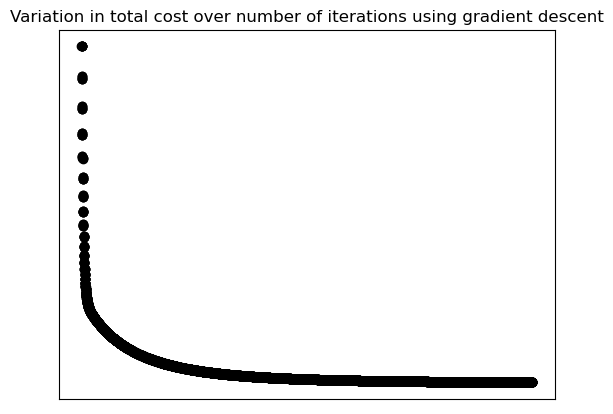

In [114]:
from sklearn import datasets, linear_model
index_vals = []
for i in range(0, len(gradient_graph)):
    index_vals.append(i)

plt.scatter(index_vals, gradient_graph,  color='black')
plt.title("Variation in total cost over number of iterations using gradient descent")
plt.xticks(())
plt.yticks(())
plt.show()
#print(regr.coef_)
#print(regr.intercept_)

In [116]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.datasets import load_iris
X = passengers[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = passengers[['Survived']]
length = len(y)
y = np.array(y)
y = y.reshape(length, 1)

LRG = linear_model.LogisticRegression(random_state = 0,solver = 'liblinear').fit(X, y)
print(LRG.score(X, y))

print(LRG.coef_)
print(LRG.intercept_)

0.7963483146067416
[[-1.02555495  2.46734222 -2.28324761 -0.28122095 -0.03425657  0.56632568
   0.15037458]]
[1.78132559]


/Users/aarushid21/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
